### Credit Card Fraud Detection
This project is related to building a Machine Learning module that can effectively detect Fraudlent Credit Card transactions and hence save money for the client Bank.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

There are two datasets hosted by kaggle named test and train. Lets examine both the datasets to decide if they needs to be merged or if it is a good idea to keep the test dataset seperate for final evaluation.

In [4]:
# Importing both the datasets provided by kaggle
fraud = pd.read_csv('gdrive/My Drive/Capstone Project/fraudTrain.csv')
fraud_test = pd.read_csv('gdrive/My Drive/Capstone Project/fraudTest.csv')

### Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Data Cleaning
- Outlier Treatment
- Variable Transformation

In [5]:
# check for the main (training) dataset
fraud.head()

Unnamed: 0 trans_date_trans_time  ...  merch_long is_fraud
0           0   2019-01-01 00:00:18  ...  -82.048315        0
1           1   2019-01-01 00:00:44  ... -118.186462        0
2           2   2019-01-01 00:00:51  ... -112.154481        0
3           3   2019-01-01 00:01:16  ... -112.561071        0
4           4   2019-01-01 00:03:06  ...  -78.632459        0

[5 rows x 23 columns]

In [6]:
# checking for various columns and nulls in the dataset
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
# basic inspection of the test dataset
fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
# checking % of data provided by Kaggle in the train & test
1296675 * 100 / (1296675 + 555719)

69.99995681264353

- 70% data is present in the train dataset and remaining 30% in the test dataset.
- No null values in either of the files

In [9]:
# Check for imbalance on target variable in the train dataset
fraud.is_fraud.value_counts(normalize=True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

Fraud Distribution
0    0.994211
1    0.005789
Name: is_fraud, dtype: float64


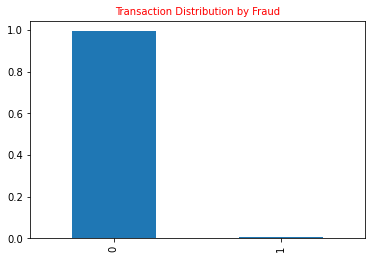

In [10]:
# Check for imbalance on target variable in the main dataset
print ('Fraud Distribution')
print (fraud.is_fraud.value_counts(normalize=True))
plt.title('Transaction Distribution by Fraud', fontsize= 10, color = 'Red', fontweight = 100)
fraud.is_fraud.value_counts(normalize=True).plot.bar()
plt.show()

In [11]:
# Check for imbalance on target variable in the test dataset
fraud_test.is_fraud.value_counts(normalize=True)

0    0.99614
1    0.00386
Name: is_fraud, dtype: float64

Both the datasets have high imbalnce of the target variable with the test dataset having slightly higher imbalance. At this point, lets keep the test data seperate. We will be building the model on the train dataset. If required, a validation dataset will be carved from it. The final evaluation will be done on the test dataset.

### Univariate Analysis
The following columns seems of very less/ no significance in determining a fraud case. Primary reason being no model can be created based on person's name or his PII or some unique ID/ S.no. assigned. Hence, dropping them:- 
- cc_num
- first 
- last 
- street 
- trans_num

In [12]:
# Dropping the unwanted columns from both datasets
fraud.drop(['cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud.drop(fraud.iloc[:,[0]], axis=1, inplace=True)
fraud_test.drop(['cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud_test.drop(fraud_test.iloc[:,[0]], axis=1, inplace=True)

In [13]:
# Inspecting the fraud dataset
fraud.head()

trans_date_trans_time  ... is_fraud
0   2019-01-01 00:00:18  ...        0
1   2019-01-01 00:00:44  ...        0
2   2019-01-01 00:00:51  ...        0
3   2019-01-01 00:01:16  ...        0
4   2019-01-01 00:03:06  ...        0

[5 rows x 17 columns]

In [14]:
# Inspecting the fraud test dataset
fraud_test.head()

trans_date_trans_time  ... is_fraud
0   2020-06-21 12:14:25  ...        0
1   2020-06-21 12:14:33  ...        0
2   2020-06-21 12:14:53  ...        0
3   2020-06-21 12:15:15  ...        0
4   2020-06-21 12:15:17  ...        0

[5 rows x 17 columns]

In [15]:
# Converting dob to age
from datetime import date
fraud['dob'] = pd.to_datetime(fraud['dob'])
fraud['age'] = (pd.to_datetime('now') - fraud['dob'])/ np.timedelta64(1, 'Y')
fraud['age'] = fraud['age'].astype(int)
fraud.drop(['dob'], axis=1, inplace=True)
fraud.head()

trans_date_trans_time                            merchant  ... is_fraud  age
0   2019-01-01 00:00:18          fraud_Rippin, Kub and Mann  ...        0   33
1   2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme  ...        0   43
2   2019-01-01 00:00:51                fraud_Lind-Buckridge  ...        0   60
3   2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  ...        0   55
4   2019-01-01 00:03:06                 fraud_Keeling-Crist  ...        0   35

[5 rows x 17 columns]

In [16]:
# Same change on the test dataset
fraud_test['dob'] = pd.to_datetime(fraud_test['dob'])
fraud_test['age'] = (pd.to_datetime('now') - fraud_test['dob'])/ np.timedelta64(1, 'Y')
fraud_test['age'] = fraud_test['age'].astype(int)
fraud_test.drop(['dob'], axis=1, inplace=True)
fraud_test.head()

trans_date_trans_time                              merchant  ... is_fraud  age
0   2020-06-21 12:14:25                 fraud_Kirlin and Sons  ...        0   53
1   2020-06-21 12:14:33                  fraud_Sporer-Keebler  ...        0   32
2   2020-06-21 12:14:53  fraud_Swaniawski, Nitzsche and Welch  ...        0   51
3   2020-06-21 12:15:15                     fraud_Haley Group  ...        0   34
4   2020-06-21 12:15:17                 fraud_Johnston-Casper  ...        0   66

[5 rows x 17 columns]

In [17]:
# Seggregating data and time from trans_date_trans_time field
fraud['trans_date'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).date
fraud['trans_time'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).time
fraud.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud.head()

merchant       category  ...  trans_date trans_time
0          fraud_Rippin, Kub and Mann       misc_net  ...  2019-01-01   00:00:18
1     fraud_Heller, Gutmann and Zieme    grocery_pos  ...  2019-01-01   00:00:44
2                fraud_Lind-Buckridge  entertainment  ...  2019-01-01   00:00:51
3  fraud_Kutch, Hermiston and Farrell  gas_transport  ...  2019-01-01   00:01:16
4                 fraud_Keeling-Crist       misc_pos  ...  2019-01-01   00:03:06

[5 rows x 18 columns]

In [18]:
# Same changes on test dataset
fraud_test['trans_date'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).date
fraud_test['trans_time'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).time
fraud_test.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud_test.head()

merchant        category  ...  trans_date trans_time
0                 fraud_Kirlin and Sons   personal_care  ...  2020-06-21   12:14:25
1                  fraud_Sporer-Keebler   personal_care  ...  2020-06-21   12:14:33
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  ...  2020-06-21   12:14:53
3                     fraud_Haley Group        misc_pos  ...  2020-06-21   12:15:15
4                 fraud_Johnston-Casper          travel  ...  2020-06-21   12:15:17

[5 rows x 18 columns]

In [19]:
# Check on numeric columns for outliers
fraud.describe()

amt           zip  ...      is_fraud           age
count  1.296675e+06  1.296675e+06  ...  1.296675e+06  1.296675e+06
mean   7.035104e+01  4.880067e+04  ...  5.788652e-03  4.784557e+01
std    1.603160e+02  2.689322e+04  ...  7.586269e-02  1.739451e+01
min    1.000000e+00  1.257000e+03  ...  0.000000e+00  1.700000e+01
25%    9.650000e+00  2.623700e+04  ...  0.000000e+00  3.400000e+01
50%    4.752000e+01  4.817400e+04  ...  0.000000e+00  4.600000e+01
75%    8.314000e+01  7.204200e+04  ...  0.000000e+00  5.900000e+01
max    2.894890e+04  9.978300e+04  ...  1.000000e+00  9.700000e+01

[8 rows x 10 columns]

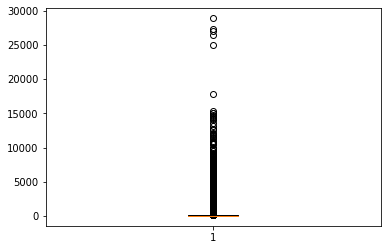

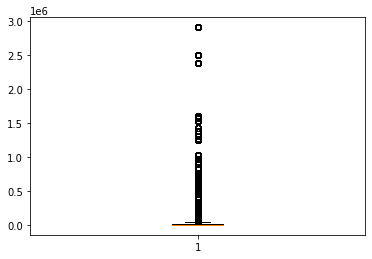

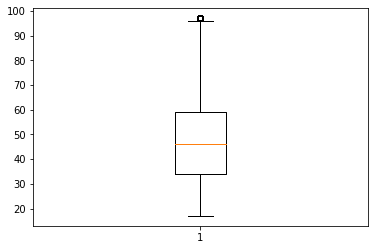

In [20]:
# Further checking distribution of continuous variables - amt, city_pop and age columns to see if there are any valid outliers
plt.boxplot(fraud.amt)
plt.show()
plt.boxplot(fraud.city_pop)
plt.show()
plt.boxplot(fraud.age)
plt.show()

The age column has no outliers while amt and city_pop stastically shows outliers. However, both amount and city population can vary drastically and none of them seems very high or very low. Hence, we will consider it as valid data.

In [21]:
# Identifying all the Numeric and non numeric columns
num = []
obj = []
for i in range (0,13):
    if fraud.iloc[:,i].dtype != 'O':
        num.append(i)
    else:
        obj.append(i)
print(num)
print(obj)
col_names = fraud.columns
print(col_names)

[2, 6, 7, 8, 9, 11, 12]
[0, 1, 3, 4, 5, 10]
Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age', 'trans_date', 'trans_time'],
      dtype='object')


In [22]:
# Checking the distribution of object variables
for i in obj:
    print (col_names[i])
    print (fraud.iloc[:,i].value_counts(normalize=True))
    print ('*' * 50)

merchant
fraud_Kilback LLC                       0.003396
fraud_Cormier LLC                       0.002814
fraud_Schumm PLC                        0.002803
fraud_Kuhn LLC                          0.002707
fraud_Boyer PLC                         0.002694
                                          ...   
fraud_Douglas, DuBuque and McKenzie     0.000598
fraud_Treutel-King                      0.000598
fraud_Medhurst, Labadie and Gottlieb    0.000585
fraud_Reichert-Weissnat                 0.000581
fraud_Hahn, Douglas and Schowalter      0.000561
Name: merchant, Length: 693, dtype: float64
**************************************************
category
gas_transport     0.101536
grocery_pos       0.095350
home              0.094947
shopping_pos      0.089978
kids_pets         0.087173
shopping_net      0.075225
entertainment     0.072504
food_dining       0.070535
personal_care     0.069993
health_fitness    0.066230
misc_pos          0.061430
misc_net          0.048807
grocery_net       0.0350

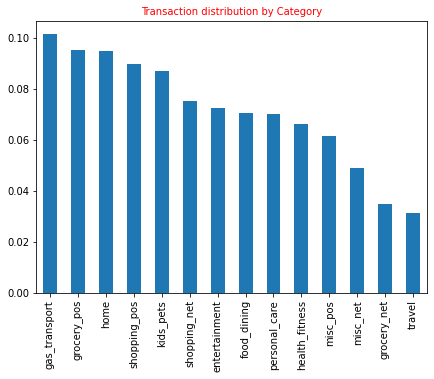

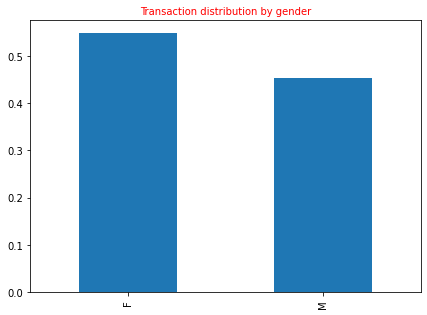

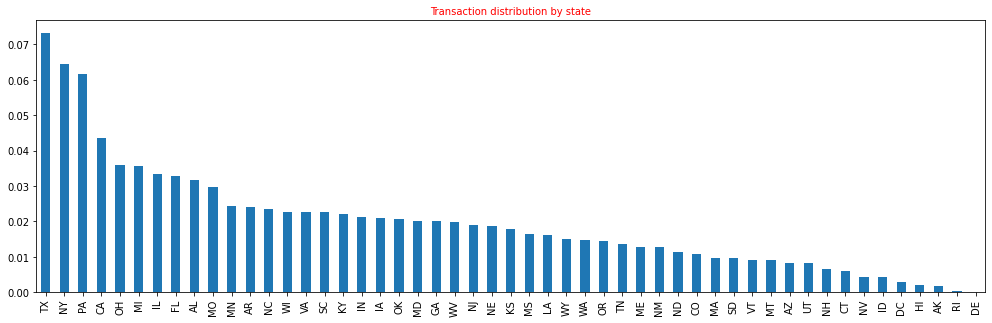

In [23]:
# Lets check the transaction distribution by Category, Gender and State variables
plt.figure(figsize = (7,5))
plt.title('Transaction distribution by Category', fontsize= 10, color = 'Red', fontweight = 100)
fraud.category.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (7,5))
plt.title('Transaction distribution by gender', fontsize= 10, color = 'Red', fontweight = 100)
fraud.gender.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (17,5))
plt.title('Transaction distribution by state', fontsize= 10, color = 'Red', fontweight = 100)
fraud.state.value_counts(normalize=True).plot.bar()
plt.show()

### Bi-Variate Analysis
Check for the behaviour of various columns against the is_fraud column

In [24]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  object 
 4   city        1296675 non-null  object 
 5   state       1296675 non-null  object 
 6   zip         1296675 non-null  int64  
 7   lat         1296675 non-null  float64
 8   long        1296675 non-null  float64
 9   city_pop    1296675 non-null  int64  
 10  job         1296675 non-null  object 
 11  unix_time   1296675 non-null  int64  
 12  merch_lat   1296675 non-null  float64
 13  merch_long  1296675 non-null  float64
 14  is_fraud    1296675 non-null  int64  
 15  age         1296675 non-null  int64  
 16  trans_date  1296675 non-null  object 
 17  trans_time  1296675 non-null  object 
dtypes: float64(5), int64(5

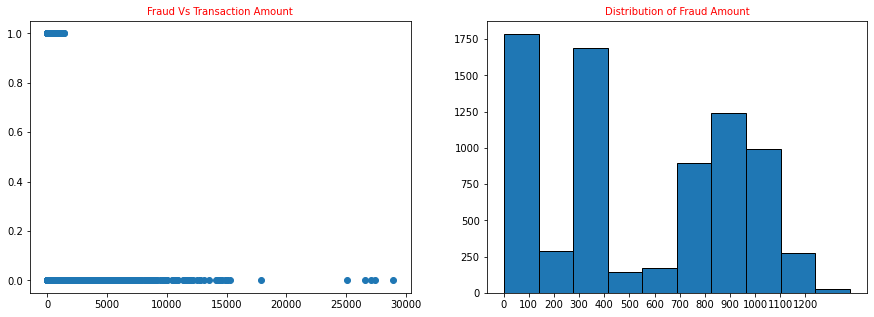

In [25]:
# Fraud Vs Amount
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title('Fraud Vs Transaction Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(fraud.amt, fraud.is_fraud)
plt.subplot(1,2,2)
#fraud.groupby('is_fraud')['amt'].mean().plot.bar()
#plt.xticks((0,1),['Not Fraud', 'Fraud'])
#plt.xticks(rotation=0)
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Fraud Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.amt, edgecolor='Black')
plt.xticks(np.arange(0, 1300, step=100))

plt.show()

As can be seen from above, frauds are happening in transactions with lower amount hence indicating there is a relation in them.

In [26]:
# Fraud transactions Vs merchant
# Total number of transactions per merchant
merch_tran_total = fraud.sort_values('merchant').groupby('merchant').count()['is_fraud']
merch_tran_total.head()

merchant
fraud_Abbott-Rogahn                 1844
fraud_Abbott-Steuber                1763
fraud_Abernathy and Sons            1751
fraud_Abshire PLC                   1895
fraud_Adams, Kovacek and Kuhlman     940
Name: is_fraud, dtype: int64

In [27]:
# Total fraud transactions per merchant
merch_tran_fraud = fraud[fraud.is_fraud == 1]['merchant'].value_counts()
merch_tran_fraud.head()

fraud_Rau and Sons       49
fraud_Cormier LLC        48
fraud_Kozey-Boehm        48
fraud_Doyle Ltd          47
fraud_Vandervort-Funk    47
Name: merchant, dtype: int64

In [28]:
# Percent of fraud transactions per merchant
fraud_perc = merch_tran_fraud/ merch_tran_total * 100
fraud_perc.sort_values(ascending=False)

fraud_Kozey-Boehm                        2.572347
fraud_Herman, Treutel and Dickens        2.538462
fraud_Kerluke-Abshire                    2.230686
fraud_Brown PLC                          2.210884
fraud_Goyette Inc                        2.161606
                                           ...   
fraud_Ritchie, Bradtke and Stiedemann         NaN
fraud_Romaguera and Sons                      NaN
fraud_Schroeder Group                         NaN
fraud_Schroeder, Wolff and Hermiston          NaN
fraud_Wiegand-Lowe                            NaN
Length: 693, dtype: float64

Baring a few merchants, most of them have equal distribution of transactions and hence this field may play important role in the model. Changing the alphabetic values to numeric as models expects numeric data.

In [29]:
# variable transformation - merchant
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
fraud.merchant = label_encoder.fit_transform(fraud.merchant)
fraud_test.merchant = label_encoder.fit_transform(fraud_test.merchant)

In [30]:
# Fraud transactions Vs City
# Percent distribution of fraud based on city
city_tran_total = fraud.sort_values('city').groupby('city').count()['is_fraud']
city_tran_fraud = fraud[fraud.is_fraud == 1]['city'].value_counts()
fraud_perc = city_tran_fraud/ city_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

East China    100.0
Walkertown    100.0
Freeport      100.0
Gaines        100.0
Granbury      100.0
dtype: float64

As can be seen, few cities have all transactions as fraud. All these cities have low transaction rate. There are 58 such cities.

In [31]:
# Transforming alphabetic city data into numeric to be processed by the model
fraud.city = label_encoder.fit_transform(fraud.city)
fraud_test.city = label_encoder.fit_transform(fraud_test.city)

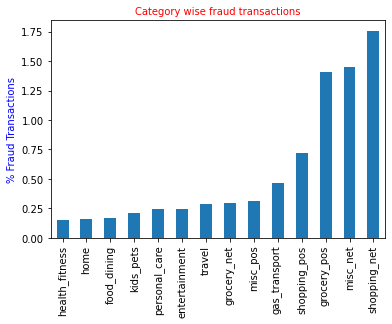

In [32]:
# category Vs fraud
# Percent distribution of fraud based on transaction category
cat_tran_total = fraud.sort_values('category').groupby('category').count()['is_fraud']
cat_tran_fraud = fraud[fraud.is_fraud == 1]['category'].value_counts()
fraud_perc = cat_tran_fraud/ cat_tran_total * 100
plt.title('Category wise fraud transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values().plot.bar()
plt.show()

In [33]:
# Transforming alphabetic category data into numeric to be processed by the model
fraud.category = label_encoder.fit_transform(fraud.category)
fraud_test.category = label_encoder.fit_transform(fraud_test.category)

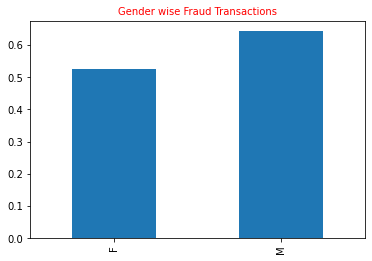

In [34]:
# Gender Vs Fraud
# Percent distribution of fraud based on Gender
gen_tran_total = fraud.sort_values('gender').groupby('gender').count()['is_fraud']
gen_tran_fraud = fraud[fraud.is_fraud == 1]['gender'].value_counts()
fraud_perc = gen_tran_fraud/ gen_tran_total * 100
plt.title('Gender wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
fraud_perc.sort_values().plot.bar()
plt.show()

In [35]:
# Transforming alphabetic gender data into numeric to be processed by the model
fraud.gender = fraud.gender.map({'M': 1, "F": 0})
fraud_test.gender = fraud_test.gender.map({'M': 1, "F": 0})

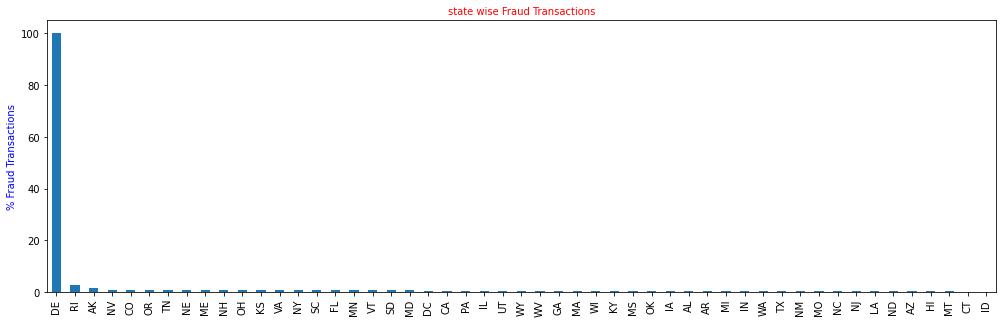

In [36]:
# state Vs fraud
# Percent distribution of fraud based on State
plt.figure(figsize = (17,5))
state_tran_total = fraud.sort_values('state').groupby('state').count()['is_fraud']
state_tran_fraud = fraud[fraud.is_fraud == 1]['state'].value_counts()
fraud_perc = state_tran_fraud/ state_tran_total * 100
plt.title('state wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values(ascending=False).plot.bar()
plt.show()

In [37]:
fraud_perc.sort_values(ascending=False).head()

DE    100.000000
RI      2.727273
AK      1.698113
NV      0.838238
CO      0.814121
dtype: float64

This is very significant. While the number of transactions in DE is very less, all of them are fraud transaction. Rest all the states have very low fraud transaction.

In [38]:
# Transforming alphabetic state data into numeric to be processed by the model
fraud.state = label_encoder.fit_transform(fraud.state)
fraud_test.state = label_encoder.fit_transform(fraud_test.state)

In [39]:
# Job Vs Fraud
# Percent distribution of fraud based on Job
job_tran_total = fraud.sort_values('job').groupby('job').count()['is_fraud']
job_tran_fraud = fraud[fraud.is_fraud == 1]['job'].value_counts()
fraud_perc = job_tran_fraud/ job_tran_total * 100
fraud_perc.sort_values(ascending=False).head(20)

Armed forces technical officer       100.000000
Engineer, site                       100.000000
Information officer                  100.000000
Legal secretary                      100.000000
Industrial buyer                     100.000000
Careers adviser                      100.000000
Homeopath                            100.000000
Broadcast journalist                 100.000000
Personnel officer                    100.000000
Forest/woodland manager              100.000000
Sales promotion account executive    100.000000
Air traffic controller               100.000000
Contracting civil engineer           100.000000
Ship broker                          100.000000
Solicitor                            100.000000
Accountant, chartered                100.000000
Dancer                               100.000000
Warehouse manager                    100.000000
Veterinary surgeon                   100.000000
Lawyer                                 5.185185
dtype: float64

There seems certain jobs that have real high % of fraud transactions.

In [40]:
# Transforming alphabetic job data into numeric to be processed by the model
fraud.job = label_encoder.fit_transform(fraud.job)
fraud_test.job = label_encoder.fit_transform(fraud_test.job)

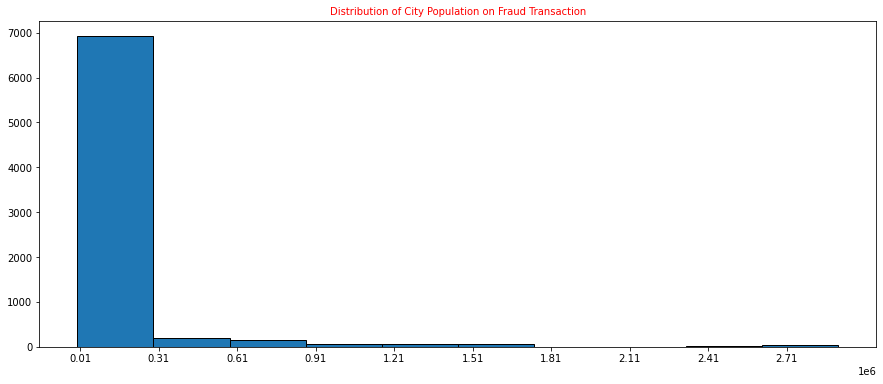

In [41]:
# Fraud Vs City Population
plt.figure(figsize=[15,6])
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of City Population on Fraud Transaction', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.city_pop, edgecolor='Black')
plt.xticks(np.arange(10000, 3000000, step=300000))
plt.show()

Cities with less population, tends to have more fraud cases.

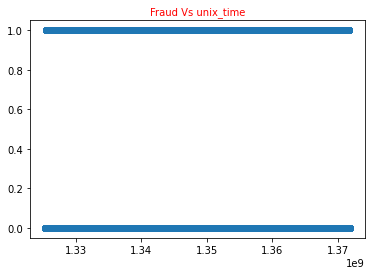

In [42]:
# Fraud Vs Unix Time
plt.title('Fraud Vs unix_time', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(fraud.unix_time, fraud.is_fraud)
plt.show()

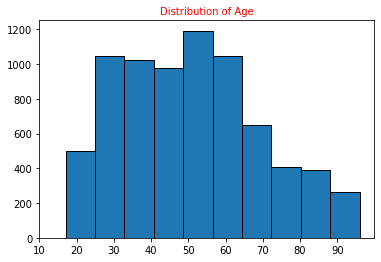

In [43]:
# Fraud Vs Age
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.age, edgecolor='Black')
plt.xticks(np.arange(10, 100, step=10))
plt.show()

So, people in age group 50 to 60 tends to be slightly more victims of fraud.

In [44]:
# Fraud Vs Zip
zip_tran_total = fraud.sort_values('zip').groupby('zip').count()['is_fraud']
zip_tran_fraud = fraud[fraud.is_fraud == 1]['zip'].value_counts()
fraud_perc = zip_tran_fraud/ zip_tran_total * 100
fraud_perc.sort_values(ascending=False).head(25)

77027    100.0
75246    100.0
11944    100.0
74108    100.0
11763    100.0
11747    100.0
32065    100.0
61364    100.0
28412    100.0
89109    100.0
10954    100.0
10553    100.0
16041    100.0
10533    100.0
16214    100.0
47842    100.0
10018    100.0
72135    100.0
90240    100.0
23117    100.0
43723    100.0
70065    100.0
12207    100.0
78208    100.0
78644    100.0
dtype: float64

As is evident from above stats, there are perticular ZIP codes that have 100% frauds.

In [45]:
# Fraud Vs lat
lat_tran_total = fraud.sort_values('lat').groupby('lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

66.6933    100.0
35.0271    100.0
42.2008    100.0
35.4359    100.0
30.5471    100.0
dtype: float64

As is evident from above stats, there are perticular latitudes codes that have 100% frauds.

In [46]:
# Fraud Vs long
long_tran_total = fraud.sort_values('long').groupby('long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

-83.8855    100.0
-88.9307    100.0
-76.2701    100.0
-81.7742    100.0
-88.4927    100.0
dtype: float64

In [47]:
# Fraud Vs merch_lat
lat_tran_total = fraud.sort_values('merch_lat').groupby('merch_lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['merch_lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

19.425114    100.0
40.920282    100.0
40.940052    100.0
40.934939    100.0
40.934619    100.0
dtype: float64

In [48]:
# Fraud Vs merch_long
long_tran_total = fraud.sort_values('merch_long').groupby('merch_long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['merch_long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

-166.550779    100.0
-81.993885     100.0
-81.998380     100.0
-81.999852     100.0
-82.003288     100.0
dtype: float64

- There are multiple demographies - Zip, City, States, Latitudes, Longitudes and Job types that have only Fraud transactions.
- Even though they have 100% frauds, the number of transactions is very low. For Example State DE had only 9 transactions in 2 years. Hence, it is very less likely to impact the model.

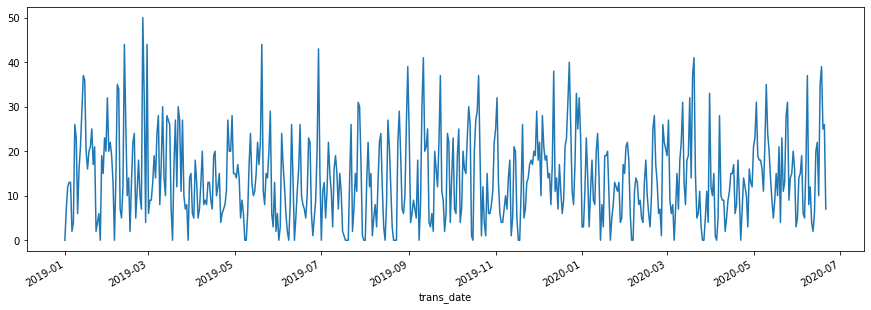

In [49]:
# Fraud Vs trans_date
fraud['trans_date'] =  pd.to_datetime(fraud['trans_date'])
plt.figure(figsize=[15,5])
fraud.groupby(['trans_date'])['is_fraud'].sum().plot()
plt.show()

Now its time to change date and time to a format more acceptable for modelling. Before that, lets pull some stats required for Cost sheet.
Also, it may be noticed that the train data is for 1.5 years (full 2019 till mid of 2020) and test data is for last 6 months of 2020. This way we will be able to build model on 1.5 year of data and test it on future data and hence check model performance in future. We will do the Cost Benifit analysis on the entire data.

In [50]:
# Total number of months
date_fraud = fraud.trans_date
date_fraud_test = pd.to_datetime(fraud_test.trans_date)
date_fraud = date_fraud.dt.to_period('M')
date_fraud_test = date_fraud_test.dt.to_period('M')
date = pd.concat([date_fraud, date_fraud_test])
print ('total number of records in file: ', date.size)

total number of records in file:  1852394


In [51]:
print ('Total number of months: ', date.value_counts().size)

Total number of months:  24


In [52]:
print ('Average transactions per month: ', round(date.size/date.value_counts().size,0) )

Average transactions per month:  77183.0


In [53]:
# Extracting fraud data
temp1 = fraud[['amt', 'is_fraud']]
temp2 = fraud_test[['amt', 'is_fraud']]
temp = pd.concat([temp1, temp2])
temp.shape

(1852394, 2)

In [54]:
# Average frauds per month
fraud_temp = temp[temp.is_fraud == 1]
print ('Average fraud transactions per month: ', round(fraud_temp.shape[0]/ date.value_counts().size,0))

Average fraud transactions per month:  402.0


In [55]:
# Average amount per fraud transaction
print ('Average amount per fraud transaction: ', round(sum(fraud_temp.amt)/ fraud_temp.shape[0], 2))

Average amount per fraud transaction:  530.66


In [56]:
# Average amount per fraud transaction
print ('max fraud amount : ' , max(fraud_temp.amt))

max fraud amount :  1376.04


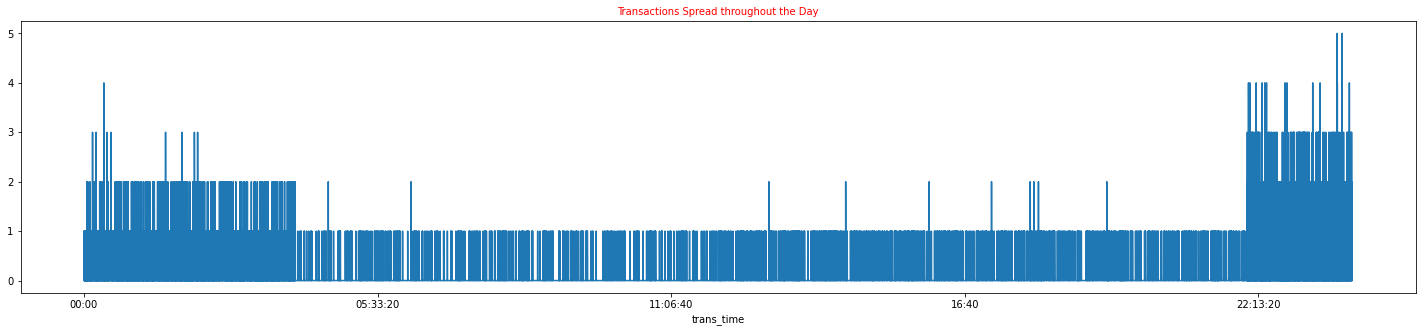

In [57]:
# Fraud Vs trans_time
import datetime as dt
fraud.trans_date = fraud.trans_date.map(dt.datetime.toordinal)
plt.figure(figsize=[25,5])
plt.title('Transactions Spread throughout the Day', fontsize= 10, color = 'Red', fontweight = 100)
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

So, late nights and early mornings are the most prone time for frauds. Highest frequency of frauds is between 10 pm to 12 am. 12 am to 4:00 am also shows very high frequency of fraud transactions.

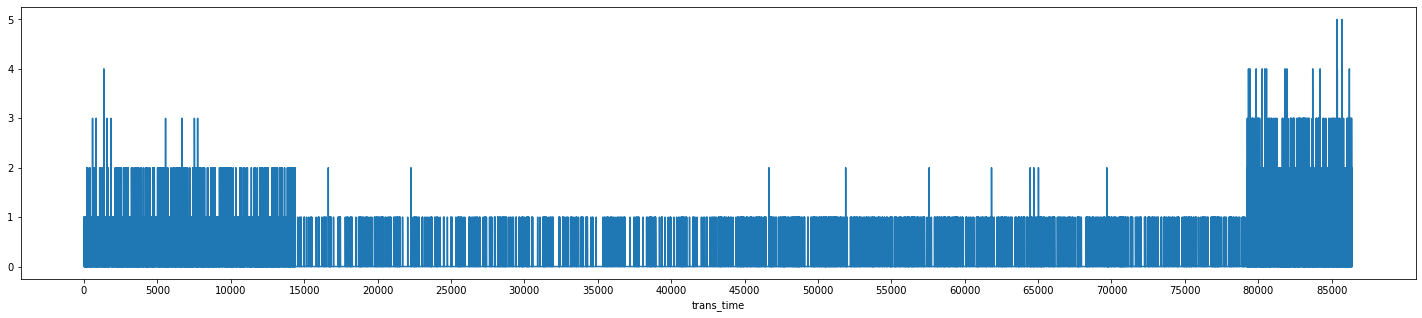

In [58]:
# Converting trans_time into seconds & ploting the above graph again
fraud.trans_time = pd.to_datetime(fraud.trans_time,format='%H:%M:%S')
fraud.trans_time = 3600 * pd.DatetimeIndex(fraud.trans_time).hour + 60 * pd.DatetimeIndex(fraud.trans_time).minute + pd.DatetimeIndex(fraud.trans_time).second
plt.figure(figsize=[25,5])
plt.xticks(np.arange(0,90000,5000))
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

In [59]:
# Similar data-time changes in test dataset
fraud_test['trans_date'] =  pd.to_datetime(fraud_test['trans_date'])
fraud_test.trans_date = fraud_test.trans_date.map(dt.datetime.toordinal)
fraud_test.trans_time = pd.to_datetime(fraud_test.trans_time,format='%H:%M:%S')
fraud_test.trans_time = 3600 * pd.DatetimeIndex(fraud_test.trans_time).hour + 60 * pd.DatetimeIndex(fraud_test.trans_time).minute + pd.DatetimeIndex(fraud_test.trans_time).second

In [60]:
print ('train : ', fraud.shape)
print ('test : ', fraud_test.shape)

train :  (1296675, 18)
test :  (555719, 18)


In [61]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  int64  
 1   category    1296675 non-null  int64  
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  int64  
 4   city        1296675 non-null  int64  
 5   state       1296675 non-null  int64  
 6   zip         1296675 non-null  int64  
 7   lat         1296675 non-null  float64
 8   long        1296675 non-null  float64
 9   city_pop    1296675 non-null  int64  
 10  job         1296675 non-null  int64  
 11  unix_time   1296675 non-null  int64  
 12  merch_lat   1296675 non-null  float64
 13  merch_long  1296675 non-null  float64
 14  is_fraud    1296675 non-null  int64  
 15  age         1296675 non-null  int64  
 16  trans_date  1296675 non-null  int64  
 17  trans_time  1296675 non-null  int64  
dtypes: float64(5), int64(1

In [62]:
fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    555719 non-null  int64  
 1   category    555719 non-null  int64  
 2   amt         555719 non-null  float64
 3   gender      555719 non-null  int64  
 4   city        555719 non-null  int64  
 5   state       555719 non-null  int64  
 6   zip         555719 non-null  int64  
 7   lat         555719 non-null  float64
 8   long        555719 non-null  float64
 9   city_pop    555719 non-null  int64  
 10  job         555719 non-null  int64  
 11  unix_time   555719 non-null  int64  
 12  merch_lat   555719 non-null  float64
 13  merch_long  555719 non-null  float64
 14  is_fraud    555719 non-null  int64  
 15  age         555719 non-null  int64  
 16  trans_date  555719 non-null  int64  
 17  trans_time  555719 non-null  int64  
dtypes: float64(5), int64(13)
memory usage: 76.3 

### Train Test Split
Splitting the data into train & validate datasets. The test dataset provided will be used for final evaluation.

In [63]:
X = fraud.drop('is_fraud', axis=1)
X.head()

merchant  category     amt  gender  ...  merch_long  age  trans_date  trans_time
0       514         8    4.97       0  ...  -82.048315   33      737060          18
1       241         4  107.23       0  ... -118.186462   43      737060          44
2       390         0  220.11       1  ... -112.154481   60      737060          51
3       360         2   45.00       1  ... -112.561071   55      737060          76
4       297         9   41.96       1  ...  -78.632459   35      737060         186

[5 rows x 17 columns]

In [64]:
y = fraud['is_fraud']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [65]:
# Splitting the data into train and test such that ration of fraud is same in both
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y, random_state=100)

In [66]:
# Inspecting the train and test datasets
print ('Train Dataset : ', X_train.shape)
print ('Test Dataset : ', X_test.shape)

Train Dataset :  (907672, 17)
Test Dataset :  (389003, 17)


In [67]:
# Creating X_final & y_final from the test dataset provided by Kaggle. This will be used for final evaluation of the model
X_final = fraud_test.drop('is_fraud', axis=1)
y_final = fraud_test['is_fraud']


### Data Scaling

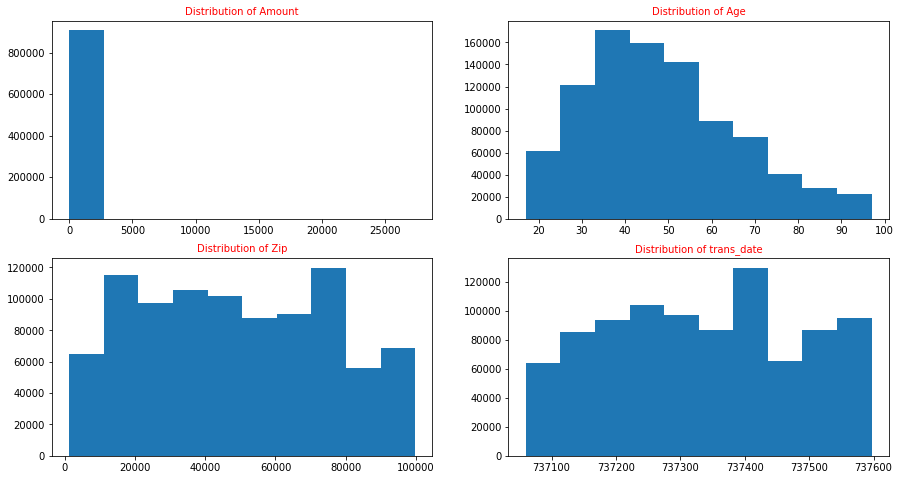

In [68]:
# Check distribution of few variables
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Distribution of Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.amt)
plt.subplot(2,2,2)
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.age)
plt.subplot(2,2,3)
plt.title('Distribution of Zip', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.zip)
plt.subplot(2,2,4)
plt.title('Distribution of trans_date', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.trans_date)
plt.show()

In [69]:
X_train.describe()

merchant       category  ...     trans_date     trans_time
count  907672.000000  907672.000000  ...  907672.000000  907672.000000
mean      342.855084       6.227442  ...  737334.968842   47885.633688
std       200.882061       3.914077  ...     148.810769   24570.364776
min         0.000000       0.000000  ...  737060.000000       0.000000
25%       166.000000       3.000000  ...  737213.000000   27479.000000
50%       346.000000       6.000000  ...  737335.000000   50894.000000
75%       514.000000      10.000000  ...  737452.000000   68742.000000
max       692.000000      13.000000  ...  737597.000000   86399.000000

[8 rows x 17 columns]

In [70]:
# Identify the variables to be scaled
vars_to_scale = ['merchant', 'category', 'amt', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'age', 'trans_date', 'trans_time']

In [71]:
# Lets try various scalers available in Scikit library. At optimum time, will finalize one.
# Based on various test results, QuantileTransformer with Gaussian distribution seems best suited.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
#scaler = MinMaxScaler()
#scaler = StandardScaler()
#scaler = PowerTransformer()
scaler = QuantileTransformer(output_distribution='normal')
#scaler = RobustScaler()

In [72]:
# Scaling
X_train[vars_to_scale] = scaler.fit_transform(X_train[vars_to_scale])
X_test[vars_to_scale] = scaler.transform(X_test[vars_to_scale])
X_final[vars_to_scale] = scaler.transform(X_final[vars_to_scale])
X_train.describe()

merchant       category  ...     trans_date     trans_time
count  907672.000000  907672.000000  ...  907672.000000  907672.000000
mean       -0.005526      -0.153638  ...      -0.003778       0.002453
std         1.023444       1.823374  ...       1.025586       1.001502
min        -5.199338      -5.199338  ...      -5.199338      -5.199338
25%        -0.680013      -0.641002  ...      -0.676854      -0.673556
50%        -0.002509      -0.035135  ...       0.001255       0.004094
75%         0.672129       0.728240  ...       0.673702       0.680349
max         5.199338       5.199338  ...       5.199338       5.199338

[8 rows x 17 columns]

In [73]:
# Inspection after scaling
X_test.describe()

merchant       category  ...     trans_date     trans_time
count  389003.000000  389003.000000  ...  389003.000000  389003.000000
mean       -0.004943      -0.151902  ...      -0.003939       0.003539
std         1.026180       1.824417  ...       1.022533       1.001449
min        -5.199338      -5.199338  ...      -5.199338      -5.199338
25%        -0.683178      -0.641002  ...      -0.676854      -0.671241
50%        -0.007527      -0.035135  ...       0.001255       0.007117
75%         0.672129       0.728240  ...       0.673702       0.679382
max         5.199338       5.199338  ...       5.199338       5.199338

[8 rows x 17 columns]

In [74]:
# Inspection after scaling
X_final.describe()

merchant       category  ...    trans_date     trans_time
count  555719.000000  555719.000000  ...  5.557190e+05  555719.000000
mean       -0.004204      -0.149465  ...  5.199338e+00       0.003383
std         1.029015       1.822612  ...  5.086602e-12       1.000918
min        -5.199338      -5.199338  ...  5.199338e+00      -5.199338
25%        -0.680013      -0.641002  ...  5.199338e+00      -0.670866
50%        -0.002509      -0.035135  ...  5.199338e+00       0.005929
75%         0.676854       0.728240  ...  5.199338e+00       0.679001
max         5.199338       5.199338  ...  5.199338e+00       5.199338

[8 rows x 17 columns]

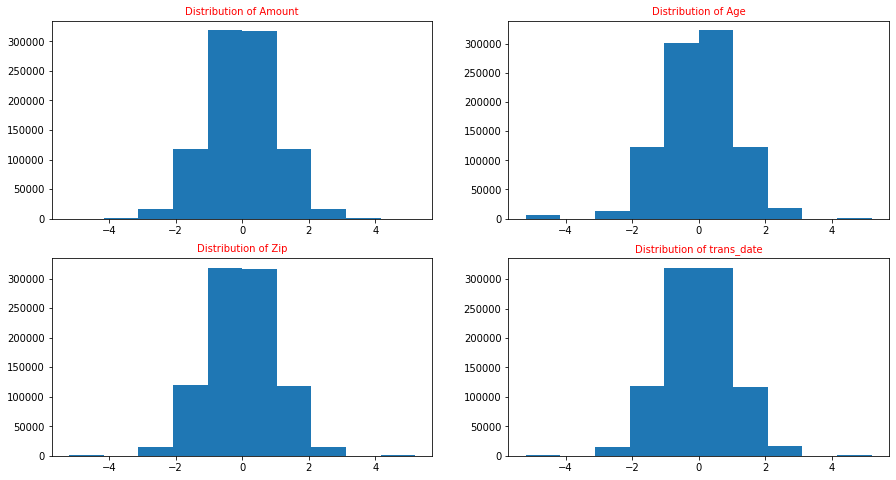

In [75]:
# Lets check the distribution after scaling
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Distribution of Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.amt)
plt.subplot(2,2,2)
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.age)
plt.subplot(2,2,3)
plt.title('Distribution of Zip', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.zip)
plt.subplot(2,2,4)
plt.title('Distribution of trans_date', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.trans_date)
plt.show()

Quite evident that post scaling Skewness in data has been handles and date is more normally distributed.

### Logistic Regression Model 
Lets start with a Basic Logistic Regression Model and check its Stats.

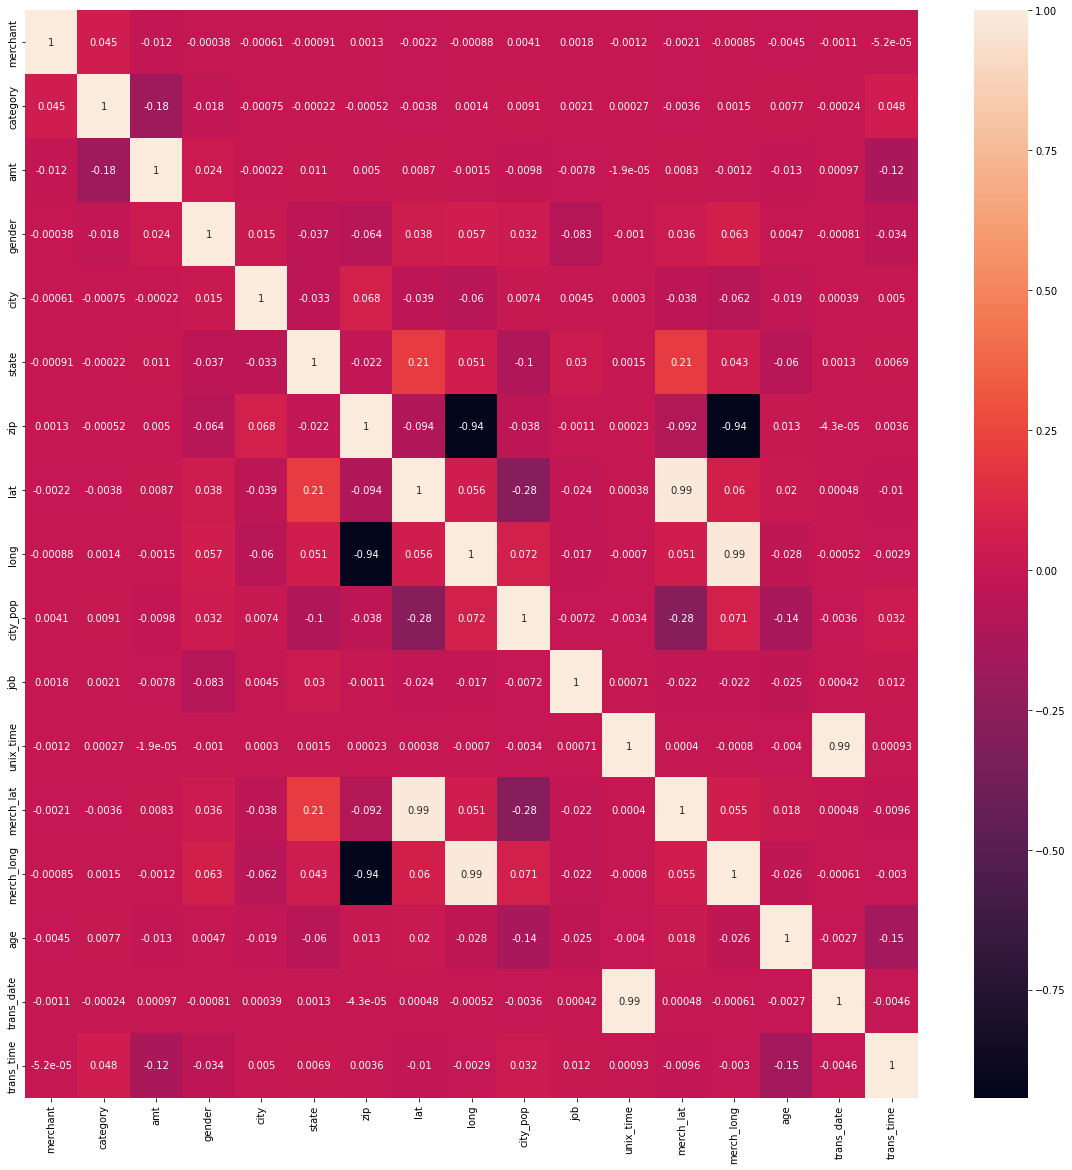

In [76]:
# Let's examine any correlation in variables and remove variables with high correlation
plt.figure(figsize = (20,20))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [77]:
# There is high correlation between variables long, merch_long and zip. Similarly merch_lat has high correlation with lat.
# This correlation will impact Linear Regression model but will be fine for other models. Hence, creating a different train & test dataframe for LR after dropping 'long', 'merch_long', 'merch_lat'.
X_train_lr = X_train.drop(['long', 'merch_long', 'merch_lat', 'unix_time'], axis=1)
X_test_lr = X_test.drop(['long', 'merch_long', 'merch_lat', 'unix_time'], axis=1)
X_final_lr = X_final.drop(['long', 'merch_long', 'merch_lat', 'unix_time'], axis=1)
X_train_lr.head()

merchant  category       amt  ...       age  trans_date  trans_time
549286 -1.147315 -0.238089  0.030404  ... -1.750222   -0.191865   -0.269851
954585  0.584984  0.193143 -0.223870  ... -0.803958    0.628724    0.597856
273376 -1.084195  0.524976 -0.243440  ... -0.221344   -0.805692   -0.474855
113993  0.848075 -0.035135 -0.089190  ... -1.304121   -1.358913    0.202690
158189  0.138444  0.995858 -1.462356  ...  1.721914   -1.164444   -0.805792

[5 rows x 13 columns]

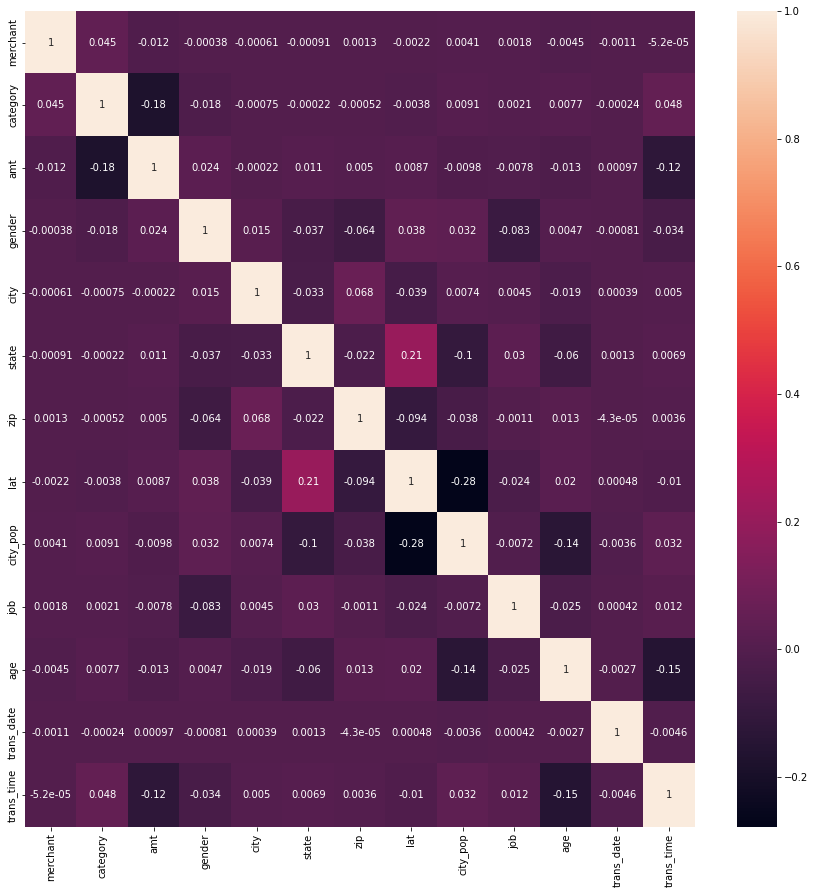

In [78]:
# Let's examine the correlation in variables again
plt.figure(figsize = (15,15))
sns.heatmap(X_train_lr.corr(), annot=True)
plt.show()

In [79]:
# Inspecting the dataset
print(X_train_lr.shape)
print(X_test_lr.shape)
print(X_final_lr.shape)

(907672, 13)
(389003, 13)
(555719, 13)


In [80]:
# Function to draw ROC curve
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
# Function to return various standard metrices for a model
def model_metrics(a, p):
  confusion = confusion_matrix(a, p)
  TP = confusion[1,1] # true positive 
  TN = confusion[0,0] # true negatives
  FP = confusion[0,1] # false positives
  FN = confusion[1,0] # false negatives
  print ('Accuracy    : ', metrics.accuracy_score(a, p ))
  print ('Sensitivity : ', TP / float(TP+FN))
  print ('Specificity : ', TN / float(TN+FP))
  print ('Pricision   : ', TP / float(TP + FP))
  print ('Recall      : ', TP / float(TP + FN))
  print(confusion)
  
  return None

In [82]:
# Function to calculate the train-test stats including cost of a model as cost is one of the factors to pick the final model
# Monthly cost of the model. Pass the classifier name here. Also pass 0 & 1
# 0 will print the model metrices with 1 will pass all the metrices to the calling routine

def cost_train_test(classifier, p):
  y_train_pred = classifier.predict(X_train)
  y_test_pred = classifier.predict(X_test)
  y_final_pred = classifier.predict(X_final)
  roc1 = metrics.roc_auc_score( y_train, y_train_pred)
  roc2 = metrics.roc_auc_score( y_test, y_test_pred)
  roc3 = metrics.roc_auc_score( y_final, y_final_pred)
  cm1 = confusion_matrix(y_train, y_train_pred)     # cm1 is confusion matrix of model on imbalanced train dataset
  cm2 = confusion_matrix(y_test, y_test_pred)       # cm2 is confusion matrix of model on test dataset
  cm3 = 0
  cm = cm1 + cm2 + cm3
  TP = cm[1,1] # true positive 
  TN = cm[0,0] # true negatives
  FP = cm[0,1] # false positives
  FN = cm[1,0] # false negatives
  tfpm = round((TP + FP)/ 24, 0)
  c1 = 1.5 * tfpm
  c2 = round (530.66 * round(FN/24,0), 2)
  c3 = round (c1 + c2, 2)
  if p == 0:
    print(cm)
    print ('Average number of transactions per month detected as fraudulent by the model: ', tfpm)
    print ('Total cost of providing customer support per month for fraudulent transactions detected by the model: ', c1)
    print ('Average number of transactions per month that are fraudulent but not detected by the model: ', round(FN/24,0))
    print ('Cost incurred due to fraudulent transactions left undetected by the model: ', c2)
    print ('Cost incurred per month after the model is built and deployed: ', c3)
    return None
       
  else:
    print(cm)
    acc = (TP + TN)/ float(TP + TN + FP + FN)
    sen = TP / float(TP+FN)
    spe = TN / float(TN+FP)
    pre =  TP / float(TP + FP)
    rec =  TP / float(TP + FN)
    return (FP, FN, TP, c3, acc, sen, spe, pre, rec, roc1, roc2, roc3)

In [83]:
# Function to calculate the overall stats including cost of a model as cost is one of the factors to pick the final model
# Monthly cost of the model. Pass the classifier name here. Also pass 0 & 1
# 0 will print the model metrices with 1 will pass all the metrices to the calling routine

def cost(classifier, p):
  y_train_pred = classifier.predict(X_train)
  y_test_pred = classifier.predict(X_test)
  y_final_pred = classifier.predict(X_final)
  roc1 = metrics.roc_auc_score( y_train, y_train_pred)
  roc2 = metrics.roc_auc_score( y_test, y_test_pred)
  roc3 = metrics.roc_auc_score( y_final, y_final_pred)
  cm1 = confusion_matrix(y_train, y_train_pred)     # cm1 is confusion matrix of model on imbalanced train dataset
  cm2 = confusion_matrix(y_test, y_test_pred)       # cm2 is confusion matrix of model on test dataset
  cm3 = confusion_matrix(y_final, y_final_pred)     # cm3 is confusion matrix of model on final dataset
  cm = cm1 + cm2 + cm3
  TP = cm[1,1] # true positive 
  TN = cm[0,0] # true negatives
  FP = cm[0,1] # false positives
  FN = cm[1,0] # false negatives
  tfpm = round((TP + FP)/ 24, 0)
  c1 = 1.5 * tfpm
  c2 = round (530.66 * round(FN/24,0), 2)
  c3 = round (c1 + c2, 2)
  if p == 0:
    print(cm)
    print ('Average number of transactions per month detected as fraudulent by the model: ', tfpm)
    print ('Total cost of providing customer support per month for fraudulent transactions detected by the model: ', c1)
    print ('Average number of transactions per month that are fraudulent but not detected by the model: ', round(FN/24,0))
    print ('Cost incurred due to fraudulent transactions left undetected by the model: ', c2)
    print ('Cost incurred per month after the model is built and deployed: ', c3)
    return None
       
  else:
    print(cm)
    acc = (TP + TN)/ float(TP + TN + FP + FN)
    sen = TP / float(TP+FN)
    spe = TN / float(TN+FP)
    pre =  TP / float(TP + FP)
    rec =  TP / float(TP + FN)
    return (FP, FN, TP, c3, acc, sen, spe, pre, rec, roc1, roc2, roc3)

In [84]:
# Logistic regression model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_lr)
lr_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lr = lr_model.fit()

In [85]:
# Threshold of 0.5 is arbitrarily taken. Since, this is just a base model, we will evaluate threshold at a later stage.
y_train_pred = lr.predict(X_train_sm)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)

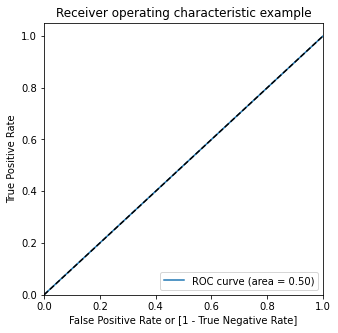

AUC for the LR Model 0.5002727532242367
Accuracy    :  0.9941895310200161
Sensitivity :  0.0005709935287400076
Specificity :  0.9999745129197334
Pricision   :  0.11538461538461539
Recall      :  0.0005709935287400076
[[902395     23]
 [  5251      3]]


In [86]:
draw_roc(y_train, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

- This model has a very high accuracy of 99% but is still not able to detedct any of the Fraud (True Positive). Reason being the data is highly imbalanced.
- Lets handle data imbalance before moving. We will use the following techinques:-
 - Random Under Sampling
 - Random Over Sampling
 - SMOTE
 - ADASYN

In [87]:
# Address imbalance using under sampling
from imblearn import under_sampling
us = under_sampling.RandomUnderSampler(random_state=100)
X_train_us, y_train_us = us.fit_resample(X_train_lr, y_train)
print (X_train_us.shape)
print (y_train_us.shape)
print (y_train_us.value_counts())

(10508, 13)
(10508,)
0    5254
1    5254
Name: is_fraud, dtype: int64


In [88]:
# Logistic Regression Model
X_train_us = sm.add_constant(X_train_us)
lr_model = sm.GLM(y_train_us ,X_train_us, family = sm.families.Binomial())
lr_us = lr_model.fit()

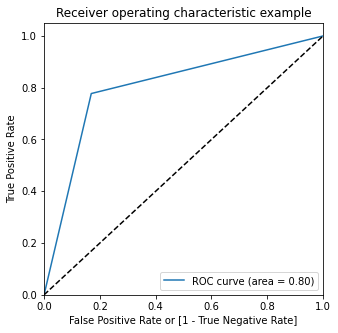

AUC for the LR Model 0.8041492196421773
Accuracy    :  0.8041492196421773
Sensitivity :  0.7775028549676437
Specificity :  0.8307955843167111
Pricision   :  0.8212706071572176
Recall      :  0.7775028549676437
[[4365  889]
 [1169 4085]]


In [89]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_us.predict(X_train_us)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_us, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

In [90]:
# Address imbalance using over sampling
from imblearn import over_sampling
ro = over_sampling.RandomOverSampler(random_state=100)
X_train_ro, y_train_ro = ro.fit_resample(X_train_lr, y_train)
print (X_train_ro.shape)
print (y_train_ro.shape)
print (y_train_ro.value_counts())

(1804836, 13)
(1804836,)
0    902418
1    902418
Name: is_fraud, dtype: int64


In [91]:
# Logistic Regression Model
X_train_ro = sm.add_constant(X_train_ro)
lr_model = sm.GLM(y_train_ro ,X_train_ro, family = sm.families.Binomial())
lr_ro = lr_model.fit()

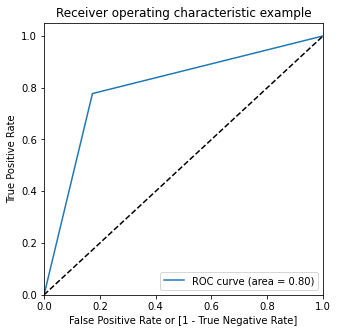

AUC for the LR Model 0.8020185767571124
Accuracy    :  0.8020185767571125
Sensitivity :  0.7773792189428845
Specificity :  0.8266579345713405
Pricision   :  0.8176730990689413
Recall      :  0.7773792189428845
[[745991 156427]
 [200897 701521]]


In [92]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_ro.predict(X_train_ro)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_ro, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

In [93]:
# Address imbalance using ADASYN
ada = over_sampling.ADASYN(random_state=100)
X_train_ada, y_train_ada = ada.fit_resample(X_train_lr, y_train)
print (X_train_ada.shape)
print (y_train_ada.shape)
print (y_train_ada.value_counts())

(1804656, 13)
(1804656,)
0    902418
1    902238
Name: is_fraud, dtype: int64


In [94]:
# Logistic Regression Model
X_train_ada = sm.add_constant(X_train_ada)
lr_model = sm.GLM(y_train_ada ,X_train_ada, family = sm.families.Binomial())
lr_ada = lr_model.fit()

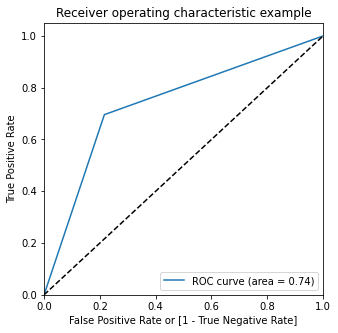

AUC for the LR Model 0.7399238932904273
Accuracy    :  0.7399282744190583
Sensitivity :  0.6959992817859589
Specificity :  0.7838485047948955
Pricision   :  0.7629948870981852
Recall      :  0.6959992817859589
[[707359 195059]
 [274281 627957]]


In [95]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_ada.predict(X_train_ada)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_ada, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

In [96]:
# Address imbalance using SMOTE
from imblearn import over_sampling
smte = over_sampling.SMOTE(random_state=100)
X_train_smte, y_train_smte = smte.fit_resample(X_train_lr, y_train)
print (X_train_smte.shape)
print (y_train_smte.shape)
print (y_train_smte.value_counts())

(1804836, 13)
(1804836,)
0    902418
1    902418
Name: is_fraud, dtype: int64


In [97]:
# Logistic Regression Model
X_train_smte = sm.add_constant(X_train_smte)
lr_model = sm.GLM(y_train_smte ,X_train_smte, family = sm.families.Binomial())
lr_smte = lr_model.fit()
X_train_smte.shape

(1804836, 14)

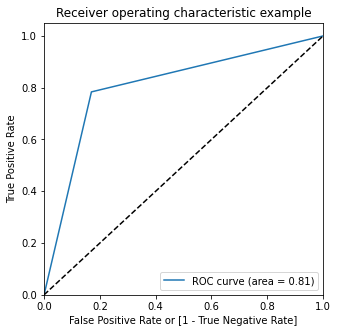

AUC for the LR Model 0.8070711133864794
Accuracy    :  0.8070711133864794
Sensitivity :  0.7838485047948955
Specificity :  0.8302937219780634
Pricision   :  0.8220277627672122
Recall      :  0.7838485047948955
[[749272 153146]
 [195059 707359]]


In [98]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_smte.predict(X_train_smte)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_smte, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

Based on the train mertices the model created on the SMOTE and Over Sampled data is slightly better than the rest. Lets evaluate the model created on SMOTE.

In [99]:
# Summary of LR model created on data cured for imbalance using SMOTE
lr_smte.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              1804836
Model:                            GLM   Df Residuals:                  1804822
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.4304e+05
Date:                Tue, 08 Feb 2022   Deviance:                   1.6861e+06
Time:                        14:01:14   Pearson chi2:                 1.81e+06
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8316      0.003   -297.114      0.000      -0.837      -0.826
merchant      -0.0142      0.002     -6.988      0.000      -0.018      -0.010
category       0.1448      0.001    119.120      0.000       0.142       0.147
amt            1.1456      0.002    712.072      0.000       1.142       1.149
gender        -0.4057      0.004   -102.514      0.000      -0.413      -0.398
city          -0.0574      0.002    -29.397      0.000      -0.061      -0.054
state         -0.0011      0.002     -0.633      0.527      -0.004       0.002
zip            0.0027      0.002      1.393      0.163      -0.001       0.006
lat            0.0194      0.002      9.342      0.000       0.015       0.023
city_pop       0.0089      0.002      4.522      0.000       0.005       0.013
job            0.0143      0.002      7.383      0.000       0.011       0.018
age            0.0773      0.002     42.126      0.000       0.074       0.081
trans_date    -0.0916      0.002    -49.809      0.000      -0.095      -0.088
trans_time     0.1044      0.002     69.266      0.000       0.101       0.107
==============================================================================
"""

In [100]:
# Check the VIF of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_smte.columns
vif['VIF'] = [variance_inflation_factor(X_train_smte.values, i) for i in range(X_train_smte.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features   VIF
0        const  2.12
8          lat  1.15
9     city_pop  1.12
6        state  1.05
13  trans_time  1.05

VIF of all the variables is under 5 and hence no major correlation among variables. Also, the P value of all variables is low. Hence, we can consider this as a final model.

In [101]:
# Getting the predicted values on the train set
y_train_pred = lr_smte.predict(X_train_smte)

In [102]:
# Lets have a dataset with only the index, is_fraud and predicted is_fraud fields
lr_fraud_final = pd.DataFrame({'Fraud Index': y_train_smte.index, 'is_fraud':y_train_smte.values, 'is_fraud_Prob':y_train_pred})
lr_fraud_final.reset_index(drop=True, inplace=True)
lr_fraud_final.head()

Fraud Index  is_fraud  is_fraud_Prob
0            0         0       0.280820
1            1         0       0.238806
2            2         0       0.184915
3            3         0       0.215862
4            4         0       0.064780

In [103]:
# To find the optimum cutoff, let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lr_fraud_final[i]= lr_fraud_final.is_fraud_Prob.map(lambda x: 1 if x > i else 0)
lr_fraud_final.head()

Fraud Index  is_fraud  is_fraud_Prob  0.0  0.1  ...  0.5  0.6  0.7  0.8  0.9
0            0         0       0.280820    1    1  ...    0    0    0    0    0
1            1         0       0.238806    1    1  ...    0    0    0    0    0
2            2         0       0.184915    1    1  ...    0    0    0    0    0
3            3         0       0.215862    1    1  ...    0    0    0    0    0
4            4         0       0.064780    1    0  ...    0    0    0    0    0

[5 rows x 13 columns]

In [104]:
# Printing confusion matrix at various cutoff
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sens','spec', 'prec', 'recall'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(lr_fraud_final.is_fraud, lr_fraud_final[i] )
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    accuracy = (TN + TP)/ (TN + TP + FP + FN)
    sens = TP/ (FN + TP)
    spec = TN/ (TN + FP)
    prec = TP/ (TP + FP)
    recall = TP/ (TP + FN)
    cutoff_df.loc[i] =[ i ,accuracy,sens,spec, prec, recall]
print(cutoff_df)

     prob  accuracy      sens      spec      prec    recall
0.0   0.0  0.500000  1.000000  0.000000  0.500000  1.000000
0.1   0.1  0.558273  0.974930  0.141616  0.531786  0.974930
0.2   0.2  0.629738  0.878745  0.380730  0.586606  0.878745
0.3   0.3  0.702360  0.803663  0.601056  0.668268  0.803663
0.4   0.4  0.763773  0.787997  0.739549  0.751584  0.787997
0.5   0.5  0.807071  0.783849  0.830294  0.822028  0.783849
0.6   0.6  0.836541  0.776762  0.896321  0.882242  0.776762
0.7   0.7  0.830446  0.714926  0.945965  0.929730  0.714926
0.8   0.8  0.761163  0.543409  0.978917  0.962651  0.543409
0.9   0.9  0.626397  0.257502  0.995292  0.982043  0.257502


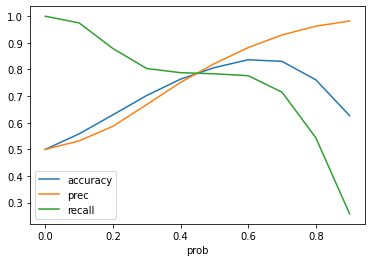

In [105]:
# Let's plot accuracy precision and recall for various probabilities.
# Recall ensures we have good TP while precision keeps a check on FN
cutoff_df.plot.line(x='prob', y=['accuracy','prec','recall'])
plt.show()

In [106]:
# Turn-out that 0.5 is optimum cut-off. Let's pull the stats for train & test datasets
y_train_pred = lr_smte.predict(X_train_smte)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
X_test_lr = sm.add_constant(X_test_lr)
y_test_pred = lr_smte.predict(X_test_lr)
y_test_pred = y_test_pred.map(lambda x: 1 if x > 0.5 else 0)

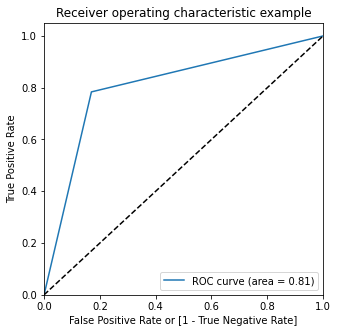

AUC for the LR Model 0.8070711133864794
Accuracy    :  0.8070711133864794
Sensitivity :  0.7838485047948955
Specificity :  0.8302937219780634
Pricision   :  0.8220277627672122
Recall      :  0.7838485047948955
[[749272 153146]
 [195059 707359]]


In [107]:
# Model Metrices on training dataset
draw_roc(y_train_smte, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

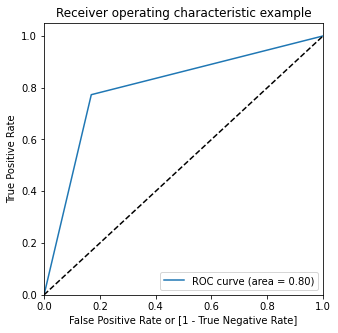

AUC for the LR Model 0.8019352985285307
Accuracy    :  0.830446037691226
Sensitivity :  0.7730905861456483
Specificity :  0.8307800109114133
Pricision   :  0.025912750978611933
Recall      :  0.7730905861456483
[[321305  65446]
 [   511   1741]]


In [108]:
# Model Metrices on test dataset
draw_roc(y_test, y_test_pred)
print ('AUC for the LR Model', metrics.roc_auc_score(y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

So the basic Regression model has a moderate AUC, Accuracy & Recall but a very low Precision. 

### Descision Tree 
Lets create a decision tree with all default parameters with Tree Depth set to 10 to control the size of tree for SMOTE and ADASYN train datasets. But before that, lets create dataset for various imbalances techinques that we will be using going forward.
Since Decision Trees, XGBOOST & Random Forest are not impacted by correlations among the variables. We will restore the dataset to all the final variables that were scaled.
It was noticed that the models build on the dataset with reduced columns were less effective overall.

In [109]:
X_train.shape

(907672, 17)

In [110]:
# Dataset for Under Sampling
us = under_sampling.RandomUnderSampler(random_state=100)
X_train_us, y_train_us = us.fit_resample(X_train, y_train)
print (X_train_us.shape)
print (y_train_us.shape)
print (y_train_us.value_counts())

(10508, 17)
(10508,)
0    5254
1    5254
Name: is_fraud, dtype: int64


In [111]:
# Dataset for Over Sampling
ro = over_sampling.RandomOverSampler(random_state=100)
X_train_ro, y_train_ro = ro.fit_resample(X_train, y_train)
print (X_train_ro.shape)
print (y_train_ro.shape)
print (y_train_ro.value_counts())

(1804836, 17)
(1804836,)
0    902418
1    902418
Name: is_fraud, dtype: int64


In [112]:
# Dataset for SMOTE
smte = over_sampling.SMOTE(random_state=100)
X_train_smte, y_train_smte = smte.fit_resample(X_train, y_train)
print (X_train_smte.shape)
print (y_train_smte.shape)
print (y_train_smte.value_counts())

(1804836, 17)
(1804836,)
0    902418
1    902418
Name: is_fraud, dtype: int64


In [113]:
# Dataset for ADASYN
ada = over_sampling.ADASYN(random_state=100)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
print (X_train_ada.shape)
print (y_train_ada.shape)
print (y_train_ada.value_counts())

(1804790, 17)
(1804790,)
0    902418
1    902372
Name: is_fraud, dtype: int64


In [114]:
# Function to create Decision Tree image
from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

# function to print the decision graph
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Fraud', "Not Fraud"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [115]:
# Decision Tree Model with default parameters and under sampled train data
from sklearn.tree import DecisionTreeClassifier
dt_us = DecisionTreeClassifier(max_depth=10)
dt_us.fit(X_train_us, y_train_us)
y_train_pred = dt_us.predict(X_train_us)
y_test_pred = dt_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

AUC         :  0.9858203273696232
Accuracy    :  0.9858203273696231
Sensitivity :  0.9912447658926532
Specificity :  0.9803958888465931
Pricision   :  0.9806062888344944
Recall      :  0.9912447658926532
[[5151  103]
 [  46 5208]]


In [116]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9756682153654496
Accuracy    :  0.9602719925259344
Sensitivity :  0.9912447658926532
Specificity :  0.9600916648382457
Pricision   :  0.12634030372131386
Recall      :  0.9912447658926532
[[866404  36014]
 [    46   5208]]


In [117]:
# Test the performance of the model on test dataset
y_test_pred = dt_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.965878031671536
Accuracy    :  0.9598023665627258
Sensitivity :  0.9720248667850799
Specificity :  0.9597311965579921
Pricision   :  0.12323368800315262
Recall      :  0.9720248667850799
[[371177  15574]
 [    63   2189]]


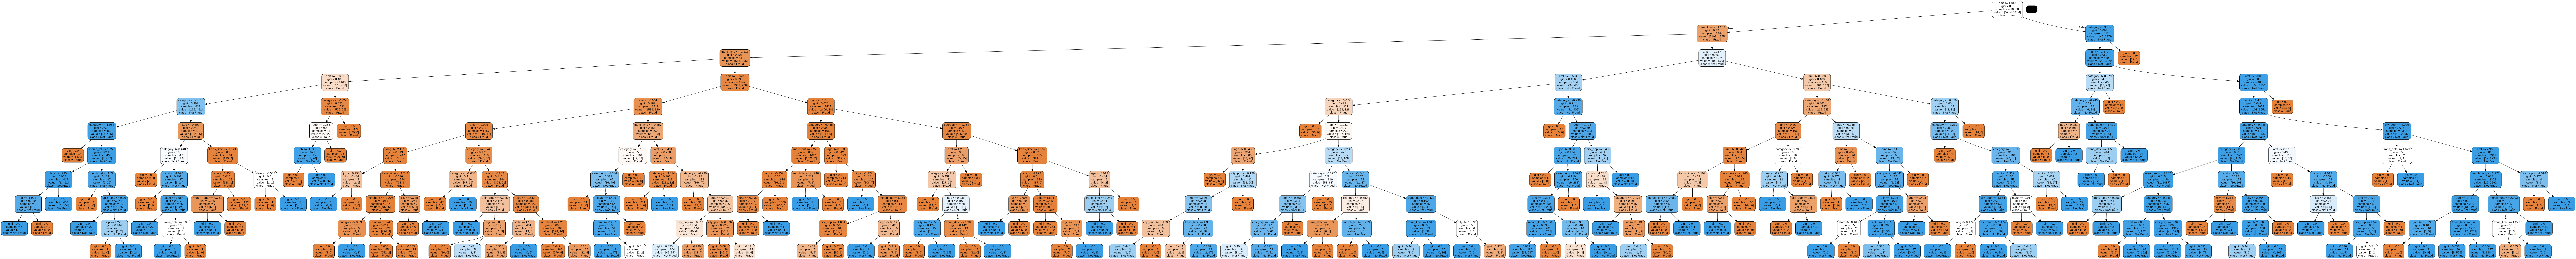

In [118]:
# Decision Graph for the above model
gph = get_dt_graph(dt_us)
Image(gph.create_png())

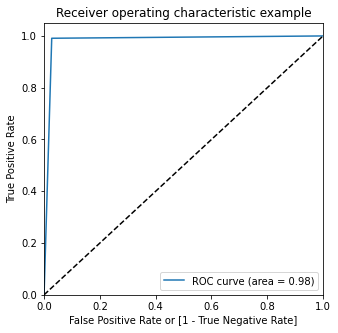

AUC         :  0.9818166304306872
Accuracy    :  0.9818166304306873
Sensitivity :  0.9910606836299808
Specificity :  0.9725725772313939
Pricision   :  0.9730704535514012
Recall      :  0.9910606836299808
[[877667  24751]
 [  8067 894351]]


In [119]:
# Decision Tree Model with default parameters and over sampled train data
dt_ro = DecisionTreeClassifier(max_depth=10)
dt_ro.fit(X_train_ro, y_train_ro)
y_train_pred = dt_ro.predict(X_train_ro)
y_test_pred = dt_ro.predict(X_test)
draw_roc(y_train_ro, y_train_pred)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

In [120]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9818135059739002
Accuracy    :  0.9726795582545237
Sensitivity :  0.9910544347164065
Specificity :  0.9725725772313939
Pricision   :  0.1738100006676013
Recall      :  0.9910544347164065
[[877667  24751]
 [    47   5207]]


In [121]:
# Test the performance of the model on test dataset
y_test_pred = dt_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9645273128010227
Accuracy    :  0.9724783613493984
Sensitivity :  0.9564831261101243
Specificity :  0.9725714994919211
Pricision   :  0.16878232251998118
Recall      :  0.9564831261101243
[[376143  10608]
 [    98   2154]]


In [122]:
#gph = get_dt_graph(dt_ro)
#Image(gph.create_png())

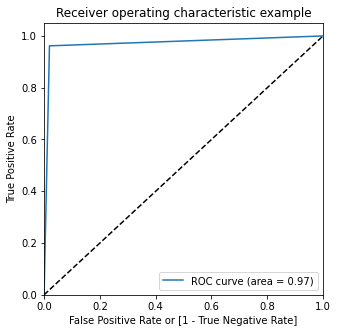

AUC         :  0.9712178835085292
Accuracy    :  0.9712178835085293
Sensitivity :  0.9617627307965931
Specificity :  0.9806730362204654
Pricision   :  0.9803005129027631
Recall      :  0.9617627307965931
[[884977  17441]
 [ 34506 867912]]


In [123]:
# Decision Tree Model with default parameters and SMOTE train data
dt_smte = DecisionTreeClassifier(max_depth=10)
dt_smte.fit(X_train_smte, y_train_smte)
y_train_pred = dt_smte.predict(X_train_smte)
y_test_pred = dt_smte.predict(X_test)
draw_roc(y_train_smte, y_train_pred)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

In [124]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9638804846119455
Accuracy    :  0.9804786310473387
Sensitivity :  0.947087933003426
Specificity :  0.9806730362204654
Pricision   :  0.22197439443279654
Recall      :  0.947087933003426
[[884977  17441]
 [   278   4976]]


In [125]:
# Test the performance of the model on test dataset
y_test_pred = dt_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9522260636089386
Accuracy    :  0.9796196944496572
Sensitivity :  0.9245115452930728
Specificity :  0.9799405819248044
Pricision   :  0.21158536585365853
Recall      :  0.9245115452930728
[[378993   7758]
 [   170   2082]]


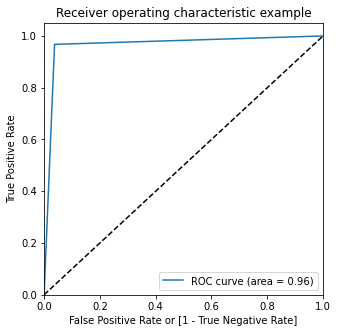

AUC         :  0.9649234077369145
Accuracy    :  0.9649233428819973
Sensitivity :  0.9674679622151396
Specificity :  0.9623788532586894
Pricision   :  0.9625675052868575
Recall      :  0.9674679622151396
[[868468  33950]
 [ 29356 873016]]


In [126]:
# Decision Tree Model with default parameters and ADASYN train data
dt_ada = DecisionTreeClassifier(max_depth=10)
dt_ada.fit(X_train_ada, y_train_ada)
y_train_pred = dt_ada.predict(X_train_ada)
y_test_pred = dt_ada.predict(X_test)
draw_roc(y_train_ada, y_train_pred)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

In [127]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9627273025334179
Accuracy    :  0.9623828872103579
Sensitivity :  0.9630757518081462
Specificity :  0.9623788532586894
Pricision   :  0.12971033068443988
Recall      :  0.9630757518081462
[[868468  33950]
 [   194   5060]]


In [128]:
# Test the performance of the model on test dataset
y_test_pred = dt_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9560834904203284
Accuracy    :  0.961833199229826
Sensitivity :  0.9502664298401421
Specificity :  0.9619005510005145
Pricision   :  0.12681481481481482
Recall      :  0.9502664298401421
[[372016  14735]
 [   112   2140]]


Based on the AUC, cost and other metrices, Decision Tree created on undersampled data seems to be more accurate that rest of the models. Lets create a dataset to store all the important features of a model.

In [129]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
model_selector_tt = pd.DataFrame( columns = ['model', 'FP','FN','TP','Cost', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall',
                                          'ROC - Train', 'ROC - Test', 'ROC - Final'])
c = cost_train_test(dt_us, 1)
model_selector_tt.loc[0] = ['DT - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost_train_test(dt_ro, 1)
model_selector_tt.loc[1] = ['DT - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost_train_test(dt_smte, 1)
model_selector_tt.loc[2] = ['DT - SMOTE - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost_train_test(dt_ada, 1)
model_selector_tt.loc[3] = ['DT - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1237581   51588]
 [    109    7397]]
[[1253810   35359]
 [    145    7361]]
[[1263970   25199]
 [    448    7058]]
[[1240484   48685]
 [    306    7200]]


model     FP   FN  ... ROC - Train  ROC - Test  ROC - Final
0     DT - US - 1  51588  109  ...    0.975668    0.965878     0.956689
1     DT - RO - 1  35359  145  ...    0.981814    0.964527     0.957593
2  DT - SMOTE - 1  25199  448  ...    0.963880    0.952226     0.944972
3    DT - ADA - 1  48685  306  ...    0.962727    0.956083     0.950657

[4 rows x 13 columns]

In [130]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
model_selector = pd.DataFrame( columns = ['model', 'FP','FN','TP','Cost', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall',
                                          'ROC - Train', 'ROC - Test', 'ROC - Final'])
c = cost(dt_us, 1)
model_selector.loc[0] = ['DT - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost(dt_ro, 1)
model_selector.loc[1] = ['DT - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost(dt_smte, 1)
model_selector.loc[2] = ['DT - SMOTE - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost(dt_ada, 1)
model_selector.loc[3] = ['DT - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1768753   73990]
 [    208    9443]]
[[1792177   50566]
 [    268    9383]]
[[1803848   38895]
 [    631    9020]]
[[1773236   69507]
 [    437    9214]]


model     FP   FN  ... ROC - Train  ROC - Test  ROC - Final
0     DT - US - 1  73990  208  ...    0.975668    0.965878     0.956689
1     DT - RO - 1  50566  268  ...    0.981814    0.964527     0.957593
2  DT - SMOTE - 1  38895  631  ...    0.963880    0.952226     0.944972
3    DT - ADA - 1  69507  437  ...    0.962727    0.956083     0.950657

[4 rows x 13 columns]

- Let's use the GridSearch CV method to test various parameters on the best model till now. 
- Also let's define a new metric/ score for model evaluation. This is based on cost of the model. Lower the cost, better its rank.

In [131]:
# Lets define a new custom score to be used for various Grid Search CV models. Instead of using Accuracy or Precision, 
# we will directly use the cost of model. Lower the cose, better the rating. 
# This way we will reduce score for False Negatives as well as False Posotoves.
from sklearn.metrics import make_scorer

# Function to calculate Monthly cost of the model
def my_score(a, p):
  cm = confusion_matrix(a, p)     
  TP = cm[1,1] # true positive 
  TN = cm[0,0] # true negatives
  FP = cm[0,1] # false positives
  FN = cm[1,0] # false negatives
  tfpm = round((TP + FP)/ 24, 0)
  c1 = 1.5 * tfpm
  c2 = round (530.66 * round(FN/24,0), 2)
  c3 = c1 + c2
  
  return c3

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
# Parameter Grid to be tested
params = {
    'max_depth': [6, 8, 10],
    'max_features': [8, 12, 14, 17],
    'class_weight': ['balanced'],
    'min_samples_leaf': [50, 100, 500, 750],
    'random_state':[0, 21, 42, 63, 100]
}
dt = DecisionTreeClassifier()

In [134]:
# Instantiate the grid search model
my_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_dt_us = GridSearchCV(estimator=dt, 
                                  param_grid=params, 
                                  cv=3, n_jobs=-1, verbose=2, scoring = my_scorer)

In [135]:
# Fitting the data as per the grid defined
grid_search_dt_us.fit(X_train_us, y_train_us)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [6, 8, 10],
                         'max_features': [8, 12, 14, 17],
                         'min_samples_leaf': [50, 100, 500, 750],
                         'random_state': [0, 21, 42, 63, 100]},
             scoring=make_scorer(my_score, greater_is_better=False), verbose=2)

In [136]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_dt_us.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)
score_df.head()

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
34        0.039008      0.001192  ...      249.802720                1
114       0.036677      0.000641  ...      249.802720                1
194       0.035979      0.000207  ...      249.802720                1
202       0.070413      0.002898  ...      499.250761                4
200       0.065987      0.001178  ...      249.448416                5

[5 rows x 16 columns]

In [137]:
# Getting the best model based on the score
dt_best = grid_search_dt_us.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_features=12,
                       min_samples_leaf=500, random_state=100)

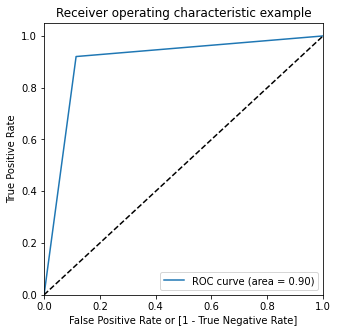

Accuracy    :  0.9028359345260754
Sensitivity :  0.9204415683288922
Specificity :  0.8852303007232585
Pricision   :  0.8891340319911748
Recall      :  0.9204415683288922
[[4651  603]
 [ 418 4836]]


In [138]:
# Test the performance of best model on train dataset
y_train_pred = dt_best.predict(X_train_us)
draw_roc(y_train_us, y_train_pred)
model_metrics(y_train_us, y_train_pred)

In [139]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.903218375081294
Accuracy    :  0.8861945724887405
Sensitivity :  0.9204415683288922
Specificity :  0.8859951818336957
Pricision   :  0.044895837201529946
Recall      :  0.9204415683288922
[[799538 102880]
 [   418   4836]]


In [140]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9051246986480206
Accuracy    :  0.8859623190566653
Sensitivity :  0.9245115452930728
Specificity :  0.8857378520029683
Pricision   :  0.04499384090074125
Recall      :  0.9245115452930728
[[342560  44191]
 [   170   2082]]


In [141]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(dt_best, 1)
model_selector_tt.loc[4] = ['DT - Grid Search US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1142098  147071]
 [    588    6918]]


model      FP   FN  ... ROC - Train  ROC - Test  ROC - Final
0              DT - US - 1   51588  109  ...    0.975668    0.965878     0.956689
1              DT - RO - 1   35359  145  ...    0.981814    0.964527     0.957593
2           DT - SMOTE - 1   25199  448  ...    0.963880    0.952226     0.944972
3             DT - ADA - 1   48685  306  ...    0.962727    0.956083     0.950657
4  DT - Grid Search US - 1  147071  588  ...    0.903218    0.905125     0.893842

[5 rows x 13 columns]

In [142]:
# getting the cost of overall model
c = cost(dt_best, 1)
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
model_selector.loc[4] = ['DT - Grid Search US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1632594  210149]
 [    799    8852]]


model      FP   FN  ... ROC - Train  ROC - Test  ROC - Final
0              DT - US - 1   73990  208  ...    0.975668    0.965878     0.956689
1              DT - RO - 1   50566  268  ...    0.981814    0.964527     0.957593
2           DT - SMOTE - 1   38895  631  ...    0.963880    0.952226     0.944972
3             DT - ADA - 1   69507  437  ...    0.962727    0.956083     0.950657
4  DT - Grid Search US - 1  210149  799  ...    0.903218    0.905125     0.893842

[5 rows x 13 columns]

### XGBOOST

In [143]:
from xgboost import XGBClassifier

In [144]:
# XGBOOST estimator on Undersampled data
xgb_us = XGBClassifier(max_depth=10, n_estimators = 10, max_features = 17, random_state=100)
xgb_us.fit(X_train_us, y_train_us)

XGBClassifier(max_depth=10, max_features=17, n_estimators=10, random_state=100)

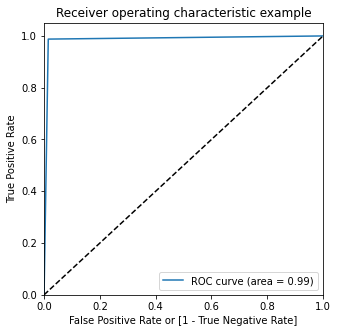

Accuracy    :  0.9863913208983631
Sensitivity :  0.9878188047202132
Specificity :  0.9849638370765131
Pricision   :  0.9850066426266844
Recall      :  0.9878188047202132
[[5175   79]
 [  64 5190]]


In [145]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_us.predict(X_train_us)
draw_roc(y_train_us, y_train_pred)
model_metrics(y_train_us, y_train_pred)

In [146]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9794837149292266
Accuracy    :  0.9712451193823319
Sensitivity :  0.9878188047202132
Specificity :  0.9711486251382397
Pricision   :  0.16620764747325947
Recall      :  0.9878188047202132
[[876382  26036]
 [    64   5190]]


In [147]:
# Test the performance of the model on test dataset
y_test_pred = xgb_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9721610751724344
Accuracy    :  0.9705400729557355
Sensitivity :  0.9738010657193605
Specificity :  0.9705210846255085
Pricision   :  0.1613211711048992
Recall      :  0.9738010657193605
[[375350  11401]
 [    59   2193]]


In [148]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_us, 1)
model_selector_tt.loc[5] = ['XGB - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1251732   37437]
 [    123    7383]]


model      FP   FN  ... ROC - Train  ROC - Test  ROC - Final
0              DT - US - 1   51588  109  ...    0.975668    0.965878     0.956689
1              DT - RO - 1   35359  145  ...    0.981814    0.964527     0.957593
2           DT - SMOTE - 1   25199  448  ...    0.963880    0.952226     0.944972
3             DT - ADA - 1   48685  306  ...    0.962727    0.956083     0.950657
4  DT - Grid Search US - 1  147071  588  ...    0.903218    0.905125     0.893842
5             XGB - US - 1   37437  123  ...    0.979484    0.972161     0.967427

[6 rows x 13 columns]

In [149]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_us, 1)
model_selector.loc[5] = ['XGB - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1789115   53628]
 [    200    9451]]


model      FP   FN  ... ROC - Train  ROC - Test  ROC - Final
0              DT - US - 1   73990  208  ...    0.975668    0.965878     0.956689
1              DT - RO - 1   50566  268  ...    0.981814    0.964527     0.957593
2           DT - SMOTE - 1   38895  631  ...    0.963880    0.952226     0.944972
3             DT - ADA - 1   69507  437  ...    0.962727    0.956083     0.950657
4  DT - Grid Search US - 1  210149  799  ...    0.903218    0.905125     0.893842
5             XGB - US - 1   53628  200  ...    0.979484    0.972161     0.967427

[6 rows x 13 columns]

In [150]:
# XGBOOST estimator on Oversampled data
xgb_ro = XGBClassifier(max_depth=10, n_estimators = 10, max_features = 17, random_state=41)
xgb_ro.fit(X_train_ro, y_train_ro)

XGBClassifier(max_depth=10, max_features=17, n_estimators=10, random_state=41)

In [151]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9867539211318923
Accuracy    :  0.9867539211318923
Sensitivity :  0.9863998723429719
Specificity :  0.9871079699208127
Pricision   :  0.9870988346368678
Recall      :  0.9863998723429719
[[890784  11634]
 [ 12273 890145]]


In [152]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9867972282036496
Accuracy    :  0.9871043725046051
Sensitivity :  0.9864864864864865
Specificity :  0.9871079699208127
Pricision   :  0.30820003567818277
Recall      :  0.9864864864864865
[[890784  11634]
 [    71   5183]]


In [153]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9712584222784177
Accuracy    :  0.9867404621558189
Sensitivity :  0.955595026642984
Specificity :  0.9869218179138516
Pricision   :  0.2984743411927878
Recall      :  0.955595026642984
[[381693   5058]
 [   100   2152]]


In [154]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_ro, 1)
model_selector_tt.loc[6] = ['DT - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1272477   16692]
 [    171    7335]]


model      FP   FN  ... ROC - Train  ROC - Test  ROC - Final
0              DT - US - 1   51588  109  ...    0.975668    0.965878     0.956689
1              DT - RO - 1   35359  145  ...    0.981814    0.964527     0.957593
2           DT - SMOTE - 1   25199  448  ...    0.963880    0.952226     0.944972
3             DT - ADA - 1   48685  306  ...    0.962727    0.956083     0.950657
4  DT - Grid Search US - 1  147071  588  ...    0.903218    0.905125     0.893842
5             XGB - US - 1   37437  123  ...    0.979484    0.972161     0.967427
6             DT - ADA - 1   16692  171  ...    0.986797    0.971258     0.964702

[7 rows x 13 columns]

In [155]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_ro, 1)
model_selector.loc[6] = ['DT - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1819231   23512]
 [    296    9355]]


model      FP   FN  ... ROC - Train  ROC - Test  ROC - Final
0              DT - US - 1   73990  208  ...    0.975668    0.965878     0.956689
1              DT - RO - 1   50566  268  ...    0.981814    0.964527     0.957593
2           DT - SMOTE - 1   38895  631  ...    0.963880    0.952226     0.944972
3             DT - ADA - 1   69507  437  ...    0.962727    0.956083     0.950657
4  DT - Grid Search US - 1  210149  799  ...    0.903218    0.905125     0.893842
5             XGB - US - 1   53628  200  ...    0.979484    0.972161     0.967427
6             DT - ADA - 1   23512  296  ...    0.986797    0.971258     0.964702

[7 rows x 13 columns]

In [156]:
# XGBOOST estimator on SMOTE
xgb_smte = XGBClassifier(max_depth=10, n_estimators = 10, max_features = 17, random_state=41)
xgb_smte.fit(X_train_smte, y_train_smte)

XGBClassifier(max_depth=10, max_features=17, n_estimators=10, random_state=41)

In [157]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_smte.predict(X_train_smte)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

AUC         :  0.9803771644625883
Accuracy    :  0.9803771644625883
Sensitivity :  0.9750514728207992
Specificity :  0.9857028561043774
Pricision   :  0.9855489322428389
Recall      :  0.9750514728207992
[[889516  12902]
 [ 22514 879904]]


In [158]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9695358589619718
Accuracy    :  0.9855156928934681
Sensitivity :  0.953368861819566
Specificity :  0.9857028561043774
Pricision   :  0.2796605437998995
Recall      :  0.953368861819566
[[889516  12902]
 [   245   5009]]


In [159]:
# Test the performance of the model on test dataset
y_test_pred = xgb_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9604360190618008
Accuracy    :  0.9849718382634581
Sensitivity :  0.9356127886323268
Specificity :  0.9852592494912747
Pricision   :  0.2698514344262295
Recall      :  0.9356127886323268
[[381050   5701]
 [   145   2107]]


In [160]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_smte, 1)
model_selector_tt.loc[7] = ['XGB - Smote - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1270566   18603]
 [    390    7116]]


model      FP   FN  ... ROC - Train  ROC - Test  ROC - Final
0              DT - US - 1   51588  109  ...    0.975668    0.965878     0.956689
1              DT - RO - 1   35359  145  ...    0.981814    0.964527     0.957593
2           DT - SMOTE - 1   25199  448  ...    0.963880    0.952226     0.944972
3             DT - ADA - 1   48685  306  ...    0.962727    0.956083     0.950657
4  DT - Grid Search US - 1  147071  588  ...    0.903218    0.905125     0.893842
5             XGB - US - 1   37437  123  ...    0.979484    0.972161     0.967427
6             DT - ADA - 1   16692  171  ...    0.986797    0.971258     0.964702
7          XGB - Smote - 1   18603  390  ...    0.969536    0.960436     0.957636

[8 rows x 13 columns]

In [161]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_smte, 1)
model_selector.loc[7] = ['XGB - Smote - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1816206   26537]
 [    541    9110]]


model      FP   FN  ... ROC - Train  ROC - Test  ROC - Final
0              DT - US - 1   73990  208  ...    0.975668    0.965878     0.956689
1              DT - RO - 1   50566  268  ...    0.981814    0.964527     0.957593
2           DT - SMOTE - 1   38895  631  ...    0.963880    0.952226     0.944972
3             DT - ADA - 1   69507  437  ...    0.962727    0.956083     0.950657
4  DT - Grid Search US - 1  210149  799  ...    0.903218    0.905125     0.893842
5             XGB - US - 1   53628  200  ...    0.979484    0.972161     0.967427
6             DT - ADA - 1   23512  296  ...    0.986797    0.971258     0.964702
7          XGB - Smote - 1   26537  541  ...    0.969536    0.960436     0.957636

[8 rows x 13 columns]

In [162]:
# XGBOOST estimator on ADASYN
xgb_ada = XGBClassifier(loss = 'exponential', max_depth=8, n_estimators = 10, max_features = 14, random_state=63)
xgb_ada.fit(X_train_ada, y_train_ada)

XGBClassifier(loss='exponential', max_depth=8, max_features=14, n_estimators=10,
              random_state=63)

In [163]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ada.predict(X_train_ada)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

AUC         :  0.9646638849949789
Accuracy    :  0.9646640329345797
Sensitivity :  0.9588595390814432
Specificity :  0.9704682309085146
Pricision   :  0.9701199016030981
Recall      :  0.9588595390814432
[[875768  26650]
 [ 37124 865248]]


In [164]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9672478192989471
Accuracy    :  0.9704309486246133
Sensitivity :  0.9640274076893796
Specificity :  0.9704682309085146
Pricision   :  0.15970361027904778
Recall      :  0.9640274076893796
[[875768  26650]
 [   189   5065]]


In [165]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9675486325799657
Accuracy    :  0.9701467597936263
Sensitivity :  0.9649200710479574
Specificity :  0.9701771941119739
Pricision   :  0.15853213686437587
Recall      :  0.9649200710479574
[[375217  11534]
 [    79   2173]]


In [166]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_ada, 1)
model_selector_tt.loc[8] = ['XGB - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1250985   38184]
 [    268    7238]]


model      FP   FN  ... ROC - Train  ROC - Test  ROC - Final
0              DT - US - 1   51588  109  ...    0.975668    0.965878     0.956689
1              DT - RO - 1   35359  145  ...    0.981814    0.964527     0.957593
2           DT - SMOTE - 1   25199  448  ...    0.963880    0.952226     0.944972
3             DT - ADA - 1   48685  306  ...    0.962727    0.956083     0.950657
4  DT - Grid Search US - 1  147071  588  ...    0.903218    0.905125     0.893842
5             XGB - US - 1   37437  123  ...    0.979484    0.972161     0.967427
6             DT - ADA - 1   16692  171  ...    0.986797    0.971258     0.964702
7          XGB - Smote - 1   18603  390  ...    0.969536    0.960436     0.957636
8            XGB - ADA - 1   38184  268  ...    0.967248    0.967549     0.958814

[9 rows x 13 columns]

In [167]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_ada, 1)
model_selector.loc[8] = ['XGB - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1788123   54620]
 [    381    9270]]


model      FP   FN  ... ROC - Train  ROC - Test  ROC - Final
0              DT - US - 1   73990  208  ...    0.975668    0.965878     0.956689
1              DT - RO - 1   50566  268  ...    0.981814    0.964527     0.957593
2           DT - SMOTE - 1   38895  631  ...    0.963880    0.952226     0.944972
3             DT - ADA - 1   69507  437  ...    0.962727    0.956083     0.950657
4  DT - Grid Search US - 1  210149  799  ...    0.903218    0.905125     0.893842
5             XGB - US - 1   53628  200  ...    0.979484    0.972161     0.967427
6             DT - ADA - 1   23512  296  ...    0.986797    0.971258     0.964702
7          XGB - Smote - 1   26537  541  ...    0.969536    0.960436     0.957636
8            XGB - ADA - 1   54620  381  ...    0.967248    0.967549     0.958814

[9 rows x 13 columns]

XGBOOST seems to have reduced the count of False Positives and cost better than Decision tree. It has also increased the count of True Positives. Among various models of XGBOOST, the one on over sampled data seems best. Lets try GridSearch CV to test various parameters on random oversampled data.

In [168]:
params = {
    'learning_rate': [0.1, 0.5, 0.9],
    'max_depth': [8, 10],
    'n_estimators': [10, 15],
    'max_features': [14],
    'class_weight': ['balanced']
}

In [169]:
# XGB - GridSearch CV on Oversampled data
xgb_ro = XGBClassifier()
my_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_xgb_ro = GridSearchCV(estimator=xgb_ro, 
                                    param_grid=params, 
                                    cv=3, n_jobs=-1, verbose=1, scoring = my_scorer)
grid_search_xgb_ro.fit(X_train_ro, y_train_ro)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'learning_rate': [0.1, 0.5, 0.9], 'max_depth': [8, 10],
                         'max_features': [14], 'n_estimators': [10, 15]},
             scoring=make_scorer(my_score, greater_is_better=False), verbose=1)

In [170]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_xgb_ro.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)

In [171]:
# Getting the best model based on the score
dt_best = grid_search_xgb_ro.best_estimator_
dt_best

XGBClassifier(class_weight='balanced', learning_rate=0.9, max_depth=10,
              max_features=14, n_estimators=15)

In [172]:
# Test the performance of best model on train dataset
y_train_pred = dt_best.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9995600708319204
Accuracy    :  0.9995600708319204
Sensitivity :  1.0
Specificity :  0.9991201416638409
Pricision   :  0.9991209151339885
Recall      :  1.0
[[901624    794]
 [     0 902418]]


In [173]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9995600708319204
Accuracy    :  0.9991252346662671
Sensitivity :  1.0
Specificity :  0.9991201416638409
Pricision   :  0.8687169312169312
Recall      :  1.0
[[901624    794]
 [     0   5254]]


In [174]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9362296671272188
Accuracy    :  0.9974087603437506
Sensitivity :  0.8743339253996447
Specificity :  0.9981254088547928
Pricision   :  0.7308834446919079
Recall      :  0.8743339253996447
[[386026    725]
 [   283   1969]]


In [175]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(dt_best, 1)
model_selector_tt.loc[9] = ['XGB - Grid Search - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1287650    1519]
 [    283    7223]]


model      FP  ... ROC - Test ROC - Final
0                 DT - US - 1   51588  ...   0.965878    0.956689
1                 DT - RO - 1   35359  ...   0.964527    0.957593
2              DT - SMOTE - 1   25199  ...   0.952226    0.944972
3                DT - ADA - 1   48685  ...   0.956083    0.950657
4     DT - Grid Search US - 1  147071  ...   0.905125    0.893842
5                XGB - US - 1   37437  ...   0.972161    0.967427
6                DT - ADA - 1   16692  ...   0.971258    0.964702
7             XGB - Smote - 1   18603  ...   0.960436    0.957636
8               XGB - ADA - 1   38184  ...   0.967549    0.958814
9  XGB - Grid Search - RO - 1    1519  ...   0.936230    0.901564

[10 rows x 13 columns]

In [176]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(dt_best, 1)
model_selector.loc[9] = ['XGB - Grid Search - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1840375    2368]
 [    702    8949]]


model      FP  ... ROC - Test ROC - Final
0                 DT - US - 1   73990  ...   0.965878    0.956689
1                 DT - RO - 1   50566  ...   0.964527    0.957593
2              DT - SMOTE - 1   38895  ...   0.952226    0.944972
3                DT - ADA - 1   69507  ...   0.956083    0.950657
4     DT - Grid Search US - 1  210149  ...   0.905125    0.893842
5                XGB - US - 1   53628  ...   0.972161    0.967427
6                DT - ADA - 1   23512  ...   0.971258    0.964702
7             XGB - Smote - 1   26537  ...   0.960436    0.957636
8               XGB - ADA - 1   54620  ...   0.967549    0.958814
9  XGB - Grid Search - RO - 1    2368  ...   0.936230    0.901564

[10 rows x 13 columns]

In [177]:
# Checking the best parameters derived for XGB on under sampled data
xgb_us = XGBClassifier(learning_rate=0.7, max_depth=10, n_estimators=20)
xgb_us.fit(X_train_us, y_train_us)

XGBClassifier(learning_rate=0.7, max_depth=10, n_estimators=20)

In [178]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_us.predict(X_train_us)
print ('AUC         : ', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

AUC         :  1.0
Accuracy    :  1.0
Sensitivity :  1.0
Specificity :  1.0
Pricision   :  1.0
Recall      :  1.0
[[5254    0]
 [   0 5254]]


This is very interesting. The model seems to have worked perfectly.Lets check its performance on test datasets.

In [179]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9868630723234687
Accuracy    :  0.9738782291400417
Sensitivity :  1.0
Specificity :  0.9737261446469374
Pricision   :  0.1813975970169866
Recall      :  1.0
[[878708  23710]
 [     0   5254]]


In [180]:
# Test the performance of the model on test dataset
y_test_pred = xgb_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9751295959384518
Accuracy    :  0.9733703853183652
Sensitivity :  0.9769094138543517
Specificity :  0.973349778022552
Pricision   :  0.1759014951627089
Recall      :  0.9769094138543517
[[376444  10307]
 [    52   2200]]


In [181]:
# Train Test stats of the model
c = cost_train_test(xgb_us, 0)

[[1255152   34017]
 [     52    7454]]
Average number of transactions per month detected as fraudulent by the model:  1728.0
Total cost of providing customer support per month for fraudulent transactions detected by the model:  2592.0
Average number of transactions per month that are fraudulent but not detected by the model:  2.0
Cost incurred due to fraudulent transactions left undetected by the model:  1061.32
Cost incurred per month after the model is built and deployed:  3653.32


In [182]:
# Overall stats for the model
c = cost(xgb_us, 0)

[[1793949   48794]
 [    139    9512]]
Average number of transactions per month detected as fraudulent by the model:  2429.0
Total cost of providing customer support per month for fraudulent transactions detected by the model:  3643.5
Average number of transactions per month that are fraudulent but not detected by the model:  6.0
Cost incurred due to fraudulent transactions left undetected by the model:  3183.96
Cost incurred per month after the model is built and deployed:  6827.46


The model has worked well to identify true positives. However, a lot of transactions were incorrectly classified as Fraud.This happened because undersampling removed non fraud data to balance the data.

In [183]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_us, 1)
model_selector_tt.loc[10] = ['XGB - US - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1255152   34017]
 [     52    7454]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   51588  ...   0.965878    0.956689
1                  DT - RO - 1   35359  ...   0.964527    0.957593
2               DT - SMOTE - 1   25199  ...   0.952226    0.944972
3                 DT - ADA - 1   48685  ...   0.956083    0.950657
4      DT - Grid Search US - 1  147071  ...   0.905125    0.893842
5                 XGB - US - 1   37437  ...   0.972161    0.967427
6                 DT - ADA - 1   16692  ...   0.971258    0.964702
7              XGB - Smote - 1   18603  ...   0.960436    0.957636
8                XGB - ADA - 1   38184  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    1519  ...   0.936230    0.901564
10                XGB - US - 2   34017  ...   0.975130    0.966373

[11 rows x 13 columns]

In [184]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_us, 1)
model_selector.loc[10] = ['XGB - US - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1793949   48794]
 [    139    9512]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   73990  ...   0.965878    0.956689
1                  DT - RO - 1   50566  ...   0.964527    0.957593
2               DT - SMOTE - 1   38895  ...   0.952226    0.944972
3                 DT - ADA - 1   69507  ...   0.956083    0.950657
4      DT - Grid Search US - 1  210149  ...   0.905125    0.893842
5                 XGB - US - 1   53628  ...   0.972161    0.967427
6                 DT - ADA - 1   23512  ...   0.971258    0.964702
7              XGB - Smote - 1   26537  ...   0.960436    0.957636
8                XGB - ADA - 1   54620  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    2368  ...   0.936230    0.901564
10                XGB - US - 2   48794  ...   0.975130    0.966373

[11 rows x 13 columns]

In [185]:
# Slight modification in best parameters for Over Sampled Data
xgb_ro = XGBClassifier(learning_rate=0.5, max_depth=10, n_estimators=15, max_features = 14)
xgb_ro.fit(X_train_ro, y_train_ro)

XGBClassifier(learning_rate=0.5, max_depth=10, max_features=14, n_estimators=15)

In [186]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9978912211414223
Accuracy    :  0.9978912211414223
Sensitivity :  1.0
Specificity :  0.9957824422828445
Pricision   :  0.9958001553699748
Recall      :  1.0
[[898612   3806]
 [     0 902418]]


In [187]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9978912211414223
Accuracy    :  0.9958068553398144
Sensitivity :  1.0
Specificity :  0.9957824422828445
Pricision   :  0.5799116997792495
Recall      :  1.0
[[898612   3806]
 [     0   5254]]


In [188]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9558495058067042
Accuracy    :  0.9947249764140637
Sensitivity :  0.91651865008881
Specificity :  0.9951803615245985
Pricision   :  0.5254582484725051
Recall      :  0.91651865008881
[[384887   1864]
 [   188   2064]]


In [189]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_ro, 1)
model_selector_tt.loc[11] = ['XGB - RO - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1283499    5670]
 [    188    7318]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   51588  ...   0.965878    0.956689
1                  DT - RO - 1   35359  ...   0.964527    0.957593
2               DT - SMOTE - 1   25199  ...   0.952226    0.944972
3                 DT - ADA - 1   48685  ...   0.956083    0.950657
4      DT - Grid Search US - 1  147071  ...   0.905125    0.893842
5                 XGB - US - 1   37437  ...   0.972161    0.967427
6                 DT - ADA - 1   16692  ...   0.971258    0.964702
7              XGB - Smote - 1   18603  ...   0.960436    0.957636
8                XGB - ADA - 1   38184  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    1519  ...   0.936230    0.901564
10                XGB - US - 2   34017  ...   0.975130    0.966373
11                XGB - RO - 2    5670  ...   0.955850    0.939367

[12 rows x 13 columns]

In [190]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_ro, 1)
model_selector.loc[11] = ['XGB - RO - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1834979    7764]
 [    440    9211]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   73990  ...   0.965878    0.956689
1                  DT - RO - 1   50566  ...   0.964527    0.957593
2               DT - SMOTE - 1   38895  ...   0.952226    0.944972
3                 DT - ADA - 1   69507  ...   0.956083    0.950657
4      DT - Grid Search US - 1  210149  ...   0.905125    0.893842
5                 XGB - US - 1   53628  ...   0.972161    0.967427
6                 DT - ADA - 1   23512  ...   0.971258    0.964702
7              XGB - Smote - 1   26537  ...   0.960436    0.957636
8                XGB - ADA - 1   54620  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    2368  ...   0.936230    0.901564
10                XGB - US - 2   48794  ...   0.975130    0.966373
11                XGB - RO - 2    7764  ...   0.955850    0.939367

[12 rows x 13 columns]

In [191]:
# Checking the best parameters derived for XGB on SMOTE data
xgb_smte = XGBClassifier(learning_rate=0.5, max_depth=10, max_features=14, n_estimators=15)
xgb_smte.fit(X_train_smte, y_train_smte)

XGBClassifier(learning_rate=0.5, max_depth=10, max_features=14, n_estimators=15)

In [192]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_smte.predict(X_train_smte)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

AUC         :  0.996949861372446
Accuracy    :  0.996949861372446
Sensitivity :  0.997408074750282
Specificity :  0.99649164799461
Pricision   :  0.9964948601985065
Recall      :  0.997408074750282
[[899252   3166]
 [  2339 900079]]


In [193]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9825435019569547
Accuracy    :  0.9963301721326646
Sensitivity :  0.9685953559192996
Specificity :  0.99649164799461
Pricision   :  0.6164748637189582
Recall      :  0.9685953559192996
[[899252   3166]
 [   165   5089]]


In [194]:
# Test the performance of the model on test dataset
y_test_pred = xgb_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9529389593580695
Accuracy    :  0.9950823001365028
Sensitivity :  0.9103019538188277
Specificity :  0.9955759648973111
Pricision   :  0.5450678011167243
Recall      :  0.9103019538188277
[[385040   1711]
 [   202   2050]]


In [195]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_smte, 1)
model_selector_tt.loc[12] = ['XGB - SMTE - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1284292    4877]
 [    367    7139]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   51588  ...   0.965878    0.956689
1                  DT - RO - 1   35359  ...   0.964527    0.957593
2               DT - SMOTE - 1   25199  ...   0.952226    0.944972
3                 DT - ADA - 1   48685  ...   0.956083    0.950657
4      DT - Grid Search US - 1  147071  ...   0.905125    0.893842
5                 XGB - US - 1   37437  ...   0.972161    0.967427
6                 DT - ADA - 1   16692  ...   0.971258    0.964702
7              XGB - Smote - 1   18603  ...   0.960436    0.957636
8                XGB - ADA - 1   38184  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    1519  ...   0.936230    0.901564
10                XGB - US - 2   34017  ...   0.975130    0.966373
11                XGB - RO - 2    5670  ...   0.955850    0.939367
12              XGB - SMTE - 2    4877  ...   0.952939    0.937222

[13 rows x 13 columns]

In [196]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_smte, 1)
model_selector.loc[12] = ['XGB - SMTE - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1835977    6766]
 [    629    9022]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   73990  ...   0.965878    0.956689
1                  DT - RO - 1   50566  ...   0.964527    0.957593
2               DT - SMOTE - 1   38895  ...   0.952226    0.944972
3                 DT - ADA - 1   69507  ...   0.956083    0.950657
4      DT - Grid Search US - 1  210149  ...   0.905125    0.893842
5                 XGB - US - 1   53628  ...   0.972161    0.967427
6                 DT - ADA - 1   23512  ...   0.971258    0.964702
7              XGB - Smote - 1   26537  ...   0.960436    0.957636
8                XGB - ADA - 1   54620  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    2368  ...   0.936230    0.901564
10                XGB - US - 2   48794  ...   0.975130    0.966373
11                XGB - RO - 2    7764  ...   0.955850    0.939367
12              XGB - SMTE - 2    6766  ...   0.952939    0.937222

[13 rows x 13 columns]

In [197]:
# Checking the best parameters derived for XGB on ADASYN data
xgb_ada = XGBClassifier(learning_rate=0.5, max_depth=10, n_estimators = 15, max_features = 14)
xgb_ada.fit(X_train_ada, y_train_ada)

XGBClassifier(learning_rate=0.5, max_depth=10, max_features=14, n_estimators=15)

In [198]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ada.predict(X_train_ada)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

AUC         :  0.9975770326925699
Accuracy    :  0.9975770034186803
Sensitivity :  0.9987255810242339
Specificity :  0.9964284843609059
Pricision   :  0.9964364886753755
Recall      :  0.9987255810242339
[[899195   3223]
 [  1150 901222]]


In [199]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9862233780769127
Accuracy    :  0.9963103411805145
Sensitivity :  0.9760182717929197
Specificity :  0.9964284843609059
Pricision   :  0.6140581966231589
Recall      :  0.9760182717929197
[[899195   3223]
 [   126   5128]]


In [200]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9535352215985341
Accuracy    :  0.994951195749133
Sensitivity :  0.9116341030195382
Specificity :  0.9954363401775302
Pricision   :  0.5377160817181771
Recall      :  0.9116341030195382
[[384986   1765]
 [   199   2053]]


In [201]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_ada, 1)
model_selector_tt.loc[13] = ['XGB - ADA - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1284181    4988]
 [    325    7181]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   51588  ...   0.965878    0.956689
1                  DT - RO - 1   35359  ...   0.964527    0.957593
2               DT - SMOTE - 1   25199  ...   0.952226    0.944972
3                 DT - ADA - 1   48685  ...   0.956083    0.950657
4      DT - Grid Search US - 1  147071  ...   0.905125    0.893842
5                 XGB - US - 1   37437  ...   0.972161    0.967427
6                 DT - ADA - 1   16692  ...   0.971258    0.964702
7              XGB - Smote - 1   18603  ...   0.960436    0.957636
8                XGB - ADA - 1   38184  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    1519  ...   0.936230    0.901564
10                XGB - US - 2   34017  ...   0.975130    0.966373
11                XGB - RO - 2    5670  ...   0.955850    0.939367
12              XGB - SMTE - 2    4877  ...   0.952939    0.937222
13               XGB - ADA - 2    4988  ...   0.953535    0.941155

[14 rows x 13 columns]

In [202]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_ada, 1)
model_selector.loc[13] = ['XGB - ADA - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1835318    7425]
 [    568    9083]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   73990  ...   0.965878    0.956689
1                  DT - RO - 1   50566  ...   0.964527    0.957593
2               DT - SMOTE - 1   38895  ...   0.952226    0.944972
3                 DT - ADA - 1   69507  ...   0.956083    0.950657
4      DT - Grid Search US - 1  210149  ...   0.905125    0.893842
5                 XGB - US - 1   53628  ...   0.972161    0.967427
6                 DT - ADA - 1   23512  ...   0.971258    0.964702
7              XGB - Smote - 1   26537  ...   0.960436    0.957636
8                XGB - ADA - 1   54620  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    2368  ...   0.936230    0.901564
10                XGB - US - 2   48794  ...   0.975130    0.966373
11                XGB - RO - 2    7764  ...   0.955850    0.939367
12              XGB - SMTE - 2    6766  ...   0.952939    0.937222
13               XGB - ADA - 2    7425  ...   0.953535    0.941155

[14 rows x 13 columns]

### Random Forest

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
# Will start from the feature values that worked best till now
# Random Forest on Under Sampled data
rf_us = RandomForestClassifier(n_estimators=20, max_depth=10, bootstrap=True, oob_score=True, n_jobs=-1)
rf_us.fit(X_train_us, y_train_us)

RandomForestClassifier(max_depth=10, n_estimators=20, n_jobs=-1, oob_score=True)

In [205]:
# Predection & Stats on Train Dataset
y_train_pred = rf_us.predict(X_train_us)
print ('AUC         : ', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

AUC         :  0.9783022459078796
Accuracy    :  0.9783022459078797
Sensitivity :  0.9672630376855729
Specificity :  0.9893414541301865
Pricision   :  0.989100817438692
Recall      :  0.9672630376855729
[[5198   56]
 [ 172 5082]]


In [206]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.967815123336491
Accuracy    :  0.968360817564054
Sensitivity :  0.9672630376855729
Specificity :  0.9683672089874094
Pricision   :  0.1511240632805995
Recall      :  0.9672630376855729
[[873872  28546]
 [   172   5082]]


In [207]:
# Test the performance of the model on test dataset
y_test_pred = rf_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9552027425836792
Accuracy    :  0.9679822520648941
Sensitivity :  0.9422735346358793
Specificity :  0.9681319505314789
Pricision   :  0.1468817055444037
Recall      :  0.9422735346358793
[[374426  12325]
 [   130   2122]]


In [208]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_us, 1)
model_selector_tt.loc[14] = ['RF - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1248298   40871]
 [    302    7204]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   51588  ...   0.965878    0.956689
1                  DT - RO - 1   35359  ...   0.964527    0.957593
2               DT - SMOTE - 1   25199  ...   0.952226    0.944972
3                 DT - ADA - 1   48685  ...   0.956083    0.950657
4      DT - Grid Search US - 1  147071  ...   0.905125    0.893842
5                 XGB - US - 1   37437  ...   0.972161    0.967427
6                 DT - ADA - 1   16692  ...   0.971258    0.964702
7              XGB - Smote - 1   18603  ...   0.960436    0.957636
8                XGB - ADA - 1   38184  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    1519  ...   0.936230    0.901564
10                XGB - US - 2   34017  ...   0.975130    0.966373
11                XGB - RO - 2    5670  ...   0.955850    0.939367
12              XGB - SMTE - 2    4877  ...   0.952939    0.937222
13               XGB - ADA - 2    4988  ...   0.953535    0.941155
14                 RF - US - 1   40871  ...   0.955203    0.951958

[15 rows x 13 columns]

In [209]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_us, 1)
model_selector.loc[14] = ['RF - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1783523   59220]
 [    437    9214]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   73990  ...   0.965878    0.956689
1                  DT - RO - 1   50566  ...   0.964527    0.957593
2               DT - SMOTE - 1   38895  ...   0.952226    0.944972
3                 DT - ADA - 1   69507  ...   0.956083    0.950657
4      DT - Grid Search US - 1  210149  ...   0.905125    0.893842
5                 XGB - US - 1   53628  ...   0.972161    0.967427
6                 DT - ADA - 1   23512  ...   0.971258    0.964702
7              XGB - Smote - 1   26537  ...   0.960436    0.957636
8                XGB - ADA - 1   54620  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    2368  ...   0.936230    0.901564
10                XGB - US - 2   48794  ...   0.975130    0.966373
11                XGB - RO - 2    7764  ...   0.955850    0.939367
12              XGB - SMTE - 2    6766  ...   0.952939    0.937222
13               XGB - ADA - 2    7425  ...   0.953535    0.941155
14                 RF - US - 1   59220  ...   0.955203    0.951958

[15 rows x 13 columns]

In [210]:
# Random Forest on Over Sampled data
rf_ro = RandomForestClassifier(n_estimators=10, max_depth=10, max_features = 12, bootstrap=True, oob_score=True, n_jobs=-1, random_state=0)
rf_ro.fit(X_train_ro, y_train_ro)

RandomForestClassifier(max_depth=10, max_features=12, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=0)

In [211]:
# Predection & Stats on Train Dataset
y_train_pred = rf_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9860175661389733
Accuracy    :  0.9860175661389733
Sensitivity :  0.984418528885727
Specificity :  0.9876166033922196
Pricision   :  0.9875768733074533
Recall      :  0.984418528885727
[[891243  11175]
 [ 14061 888357]]


In [212]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9860047234699963
Accuracy    :  0.9875979428692303
Sensitivity :  0.9843928435477731
Specificity :  0.9876166033922196
Pricision   :  0.3163883281336025
Recall      :  0.9843928435477731
[[891243  11175]
 [    82   5172]]


In [213]:
# Test the performance of the model on test dataset
y_test_pred = rf_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9697084671030414
Accuracy    :  0.9871697647575983
Sensitivity :  0.9520426287744227
Specificity :  0.9873743054316602
Pricision   :  0.30510886580333
Recall      :  0.9520426287744227
[[381868   4883]
 [   108   2144]]


In [214]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_ro, 1)
model_selector_tt.loc[15] = ['RF - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1273111   16058]
 [    190    7316]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   51588  ...   0.965878    0.956689
1                  DT - RO - 1   35359  ...   0.964527    0.957593
2               DT - SMOTE - 1   25199  ...   0.952226    0.944972
3                 DT - ADA - 1   48685  ...   0.956083    0.950657
4      DT - Grid Search US - 1  147071  ...   0.905125    0.893842
5                 XGB - US - 1   37437  ...   0.972161    0.967427
6                 DT - ADA - 1   16692  ...   0.971258    0.964702
7              XGB - Smote - 1   18603  ...   0.960436    0.957636
8                XGB - ADA - 1   38184  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    1519  ...   0.936230    0.901564
10                XGB - US - 2   34017  ...   0.975130    0.966373
11                XGB - RO - 2    5670  ...   0.955850    0.939367
12              XGB - SMTE - 2    4877  ...   0.952939    0.937222
13               XGB - ADA - 2    4988  ...   0.953535    0.941155
14                 RF - US - 1   40871  ...   0.955203    0.951958
15                 RF - RO - 1   16058  ...   0.969708    0.966216

[16 rows x 13 columns]

In [215]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_ro, 1)
model_selector.loc[15] = ['RF - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1820250   22493]
 [    310    9341]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   73990  ...   0.965878    0.956689
1                  DT - RO - 1   50566  ...   0.964527    0.957593
2               DT - SMOTE - 1   38895  ...   0.952226    0.944972
3                 DT - ADA - 1   69507  ...   0.956083    0.950657
4      DT - Grid Search US - 1  210149  ...   0.905125    0.893842
5                 XGB - US - 1   53628  ...   0.972161    0.967427
6                 DT - ADA - 1   23512  ...   0.971258    0.964702
7              XGB - Smote - 1   26537  ...   0.960436    0.957636
8                XGB - ADA - 1   54620  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    2368  ...   0.936230    0.901564
10                XGB - US - 2   48794  ...   0.975130    0.966373
11                XGB - RO - 2    7764  ...   0.955850    0.939367
12              XGB - SMTE - 2    6766  ...   0.952939    0.937222
13               XGB - ADA - 2    7425  ...   0.953535    0.941155
14                 RF - US - 1   59220  ...   0.955203    0.951958
15                 RF - RO - 1   22493  ...   0.969708    0.966216

[16 rows x 13 columns]

In [216]:
# Random Forest on SMOTE data
rf_smte = RandomForestClassifier(n_estimators=10, max_depth=12, max_features = 12, bootstrap=True, oob_score=True, n_jobs=-1, random_state=63)
rf_smte.fit(X_train_smte, y_train_smte)

RandomForestClassifier(max_depth=12, max_features=12, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=63)

In [217]:
# Predection & Stats on Train Dataset
y_train_pred = rf_smte.predict(X_train_smte)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

AUC         :  0.9857953852870843
Accuracy    :  0.9857953852870842
Sensitivity :  0.9835397786834926
Specificity :  0.9880509918906759
Pricision   :  0.9879968430906988
Recall      :  0.9835397786834926
[[891635  10783]
 [ 14854 887564]]


In [218]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9781328427287411
Accuracy    :  0.9879361707753461
Sensitivity :  0.9682146935668062
Specificity :  0.9880509918906759
Pricision   :  0.3205419029615627
Recall      :  0.9682146935668062
[[891635  10783]
 [   167   5087]]


In [219]:
# Test the performance of the model on test dataset
y_test_pred = rf_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9598876601053198
Accuracy    :  0.9869538281195774
Sensitivity :  0.9325044404973357
Specificity :  0.987270879713304
Pricision   :  0.299017513882956
Recall      :  0.9325044404973357
[[381828   4923]
 [   152   2100]]


In [220]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_smte, 1)
model_selector_tt.loc[16] = ['RF - SMTE - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1273463   15706]
 [    319    7187]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   51588  ...   0.965878    0.956689
1                  DT - RO - 1   35359  ...   0.964527    0.957593
2               DT - SMOTE - 1   25199  ...   0.952226    0.944972
3                 DT - ADA - 1   48685  ...   0.956083    0.950657
4      DT - Grid Search US - 1  147071  ...   0.905125    0.893842
5                 XGB - US - 1   37437  ...   0.972161    0.967427
6                 DT - ADA - 1   16692  ...   0.971258    0.964702
7              XGB - Smote - 1   18603  ...   0.960436    0.957636
8                XGB - ADA - 1   38184  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    1519  ...   0.936230    0.901564
10                XGB - US - 2   34017  ...   0.975130    0.966373
11                XGB - RO - 2    5670  ...   0.955850    0.939367
12              XGB - SMTE - 2    4877  ...   0.952939    0.937222
13               XGB - ADA - 2    4988  ...   0.953535    0.941155
14                 RF - US - 1   40871  ...   0.955203    0.951958
15                 RF - RO - 1   16058  ...   0.969708    0.966216
16               RF - SMTE - 1   15706  ...   0.959888    0.952144

[17 rows x 13 columns]

In [221]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_smte, 1)
model_selector.loc[16] = ['RF - SMTE - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1820249   22494]
 [    498    9153]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   73990  ...   0.965878    0.956689
1                  DT - RO - 1   50566  ...   0.964527    0.957593
2               DT - SMOTE - 1   38895  ...   0.952226    0.944972
3                 DT - ADA - 1   69507  ...   0.956083    0.950657
4      DT - Grid Search US - 1  210149  ...   0.905125    0.893842
5                 XGB - US - 1   53628  ...   0.972161    0.967427
6                 DT - ADA - 1   23512  ...   0.971258    0.964702
7              XGB - Smote - 1   26537  ...   0.960436    0.957636
8                XGB - ADA - 1   54620  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    2368  ...   0.936230    0.901564
10                XGB - US - 2   48794  ...   0.975130    0.966373
11                XGB - RO - 2    7764  ...   0.955850    0.939367
12              XGB - SMTE - 2    6766  ...   0.952939    0.937222
13               XGB - ADA - 2    7425  ...   0.953535    0.941155
14                 RF - US - 1   59220  ...   0.955203    0.951958
15                 RF - RO - 1   22493  ...   0.969708    0.966216
16               RF - SMTE - 1   22494  ...   0.959888    0.952144

[17 rows x 13 columns]

In [222]:
# Random Forest on ADASYN data
rf_ada = RandomForestClassifier(n_estimators=15, max_depth=10, max_features = 14, bootstrap=True, oob_score=True, n_jobs=-1, random_state=63)
rf_ada.fit(X_train_ada, y_train_ada)


RandomForestClassifier(max_depth=10, max_features=14, n_estimators=15,
                       n_jobs=-1, oob_score=True, random_state=63)

In [223]:
# Predection & Stats on Train Dataset
y_train_pred = rf_ada.predict(X_train_ada)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

AUC         :  0.9757184304741614
Accuracy    :  0.9757185046459699
Sensitivity :  0.9728083318188064
Specificity :  0.9786285291295165
Pricision   :  0.9785023424933761
Recall      :  0.9728083318188064
[[883132  19286]
 [ 24537 877835]]


In [224]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9737071081125314
Accuracy    :  0.9785715544822359
Sensitivity :  0.9687856870955462
Specificity :  0.9786285291295165
Pricision   :  0.20881194617656712
Recall      :  0.9687856870955462
[[883132  19286]
 [   164   5090]]


In [225]:
# Test the performance of the model on test dataset
y_test_pred = rf_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9652129863913018
Accuracy    :  0.9777919450492669
Sensitivity :  0.9524866785079928
Specificity :  0.9779392942746108
Pricision   :  0.20089912896881146
Recall      :  0.9524866785079928
[[378219   8532]
 [   107   2145]]


In [226]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_ada, 1)
model_selector_tt.loc[17] = ['RF - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1261351   27818]
 [    271    7235]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   51588  ...   0.965878    0.956689
1                  DT - RO - 1   35359  ...   0.964527    0.957593
2               DT - SMOTE - 1   25199  ...   0.952226    0.944972
3                 DT - ADA - 1   48685  ...   0.956083    0.950657
4      DT - Grid Search US - 1  147071  ...   0.905125    0.893842
5                 XGB - US - 1   37437  ...   0.972161    0.967427
6                 DT - ADA - 1   16692  ...   0.971258    0.964702
7              XGB - Smote - 1   18603  ...   0.960436    0.957636
8                XGB - ADA - 1   38184  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    1519  ...   0.936230    0.901564
10                XGB - US - 2   34017  ...   0.975130    0.966373
11                XGB - RO - 2    5670  ...   0.955850    0.939367
12              XGB - SMTE - 2    4877  ...   0.952939    0.937222
13               XGB - ADA - 2    4988  ...   0.953535    0.941155
14                 RF - US - 1   40871  ...   0.955203    0.951958
15                 RF - RO - 1   16058  ...   0.969708    0.966216
16               RF - SMTE - 1   15706  ...   0.959888    0.952144
17                RF - ADA - 1   27818  ...   0.965213    0.956656

[18 rows x 13 columns]

In [227]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_ada, 1)
model_selector.loc[17] = ['RF - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1803067   39676]
 [    411    9240]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   73990  ...   0.965878    0.956689
1                  DT - RO - 1   50566  ...   0.964527    0.957593
2               DT - SMOTE - 1   38895  ...   0.952226    0.944972
3                 DT - ADA - 1   69507  ...   0.956083    0.950657
4      DT - Grid Search US - 1  210149  ...   0.905125    0.893842
5                 XGB - US - 1   53628  ...   0.972161    0.967427
6                 DT - ADA - 1   23512  ...   0.971258    0.964702
7              XGB - Smote - 1   26537  ...   0.960436    0.957636
8                XGB - ADA - 1   54620  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    2368  ...   0.936230    0.901564
10                XGB - US - 2   48794  ...   0.975130    0.966373
11                XGB - RO - 2    7764  ...   0.955850    0.939367
12              XGB - SMTE - 2    6766  ...   0.952939    0.937222
13               XGB - ADA - 2    7425  ...   0.953535    0.941155
14                 RF - US - 1   59220  ...   0.955203    0.951958
15                 RF - RO - 1   22493  ...   0.969708    0.966216
16               RF - SMTE - 1   22494  ...   0.959888    0.952144
17                RF - ADA - 1   39676  ...   0.965213    0.956656

[18 rows x 13 columns]

In [228]:
# Parameter tuining using GridSearch CV
params = {
    'max_depth': [8, 10],
    'n_estimators': [10, 15],
    'max_features': [12, 14],
#    'min_samples_split': [50, 100],
#    'min_samples_leaf':  [50, 100],
#    'max_leaf_nodes': [200, 250, 300],
    'random_state':[21, 41]
}

In [229]:
# Random Forest with GridSearch CV on Over Sampled data
rf_ro = RandomForestClassifier()
y_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_rf_ro = GridSearchCV(estimator=rf_ro,
                                    param_grid=params,
                                    cv=2, n_jobs=-1, verbose=1, scoring = my_scorer)
grid_search_rf_ro.fit(X_train_ro, y_train_ro)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [12, 14],
                         'n_estimators': [10, 15], 'random_state': [21, 41]},
             scoring=make_scorer(my_score, greater_is_better=False), verbose=1)

In [230]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_rf_ro.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)
score_df.head()

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
13      78.448705      0.039740  ...        10317.12                1
12      77.100023      2.169239  ...         1602.48                2
15      80.702548      0.312315  ...          535.16                3
14      81.016287      0.947880  ...         8997.22                4
10      99.405867      0.317160  ...        16905.37                5

[5 rows x 14 columns]

In [231]:
# Getting the best model based on the score
dt_best = grid_search_rf_ro.best_estimator_
dt_best

RandomForestClassifier(max_depth=10, max_features=14, n_estimators=10,
                       random_state=41)

In [232]:
# Predection & Stats on Train Dataset
y_train_pred = dt_best.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9883961756081993
Accuracy    :  0.9883961756081993
Sensitivity :  0.9917410778597058
Specificity :  0.9850512733566928
Pricision   :  0.9851506128536912
Recall      :  0.9917410778597058
[[888928  13490]
 [  7453 894965]]


In [233]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9884335163890431
Accuracy    :  0.9850904291418046
Sensitivity :  0.9918157594213932
Specificity :  0.9850512733566928
Pricision   :  0.2786482006309823
Recall      :  0.9918157594213932
[[888928  13490]
 [    43   5211]]


In [234]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9699349135111386
Accuracy    :  0.984547677010203
Sensitivity :  0.9551509769094139
Specificity :  0.9847188501128633
Pricision   :  0.2668403423892817
Recall      :  0.9551509769094139
[[380841   5910]
 [   101   2151]]


In [235]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(dt_best, 1)
model_selector_tt.loc[18] = ['RF - Grid Search - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1269769   19400]
 [    144    7362]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   51588  ...   0.965878    0.956689
1                  DT - RO - 1   35359  ...   0.964527    0.957593
2               DT - SMOTE - 1   25199  ...   0.952226    0.944972
3                 DT - ADA - 1   48685  ...   0.956083    0.950657
4      DT - Grid Search US - 1  147071  ...   0.905125    0.893842
5                 XGB - US - 1   37437  ...   0.972161    0.967427
6                 DT - ADA - 1   16692  ...   0.971258    0.964702
7              XGB - Smote - 1   18603  ...   0.960436    0.957636
8                XGB - ADA - 1   38184  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    1519  ...   0.936230    0.901564
10                XGB - US - 2   34017  ...   0.975130    0.966373
11                XGB - RO - 2    5670  ...   0.955850    0.939367
12              XGB - SMTE - 2    4877  ...   0.952939    0.937222
13               XGB - ADA - 2    4988  ...   0.953535    0.941155
14                 RF - US - 1   40871  ...   0.955203    0.951958
15                 RF - RO - 1   16058  ...   0.969708    0.966216
16               RF - SMTE - 1   15706  ...   0.959888    0.952144
17                RF - ADA - 1   27818  ...   0.965213    0.956656
18   RF - Grid Search - RO - 1   19400  ...   0.969935    0.965560

[19 rows x 13 columns]

In [236]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(dt_best, 1)
model_selector.loc[18] = ['RF - Grid Search - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1815150   27593]
 [    260    9391]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   73990  ...   0.965878    0.956689
1                  DT - RO - 1   50566  ...   0.964527    0.957593
2               DT - SMOTE - 1   38895  ...   0.952226    0.944972
3                 DT - ADA - 1   69507  ...   0.956083    0.950657
4      DT - Grid Search US - 1  210149  ...   0.905125    0.893842
5                 XGB - US - 1   53628  ...   0.972161    0.967427
6                 DT - ADA - 1   23512  ...   0.971258    0.964702
7              XGB - Smote - 1   26537  ...   0.960436    0.957636
8                XGB - ADA - 1   54620  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    2368  ...   0.936230    0.901564
10                XGB - US - 2   48794  ...   0.975130    0.966373
11                XGB - RO - 2    7764  ...   0.955850    0.939367
12              XGB - SMTE - 2    6766  ...   0.952939    0.937222
13               XGB - ADA - 2    7425  ...   0.953535    0.941155
14                 RF - US - 1   59220  ...   0.955203    0.951958
15                 RF - RO - 1   22493  ...   0.969708    0.966216
16               RF - SMTE - 1   22494  ...   0.959888    0.952144
17                RF - ADA - 1   39676  ...   0.965213    0.956656
18   RF - Grid Search - RO - 1   27593  ...   0.969935    0.965560

[19 rows x 13 columns]

In [237]:
# Slight modifications on the best parameters obtained
rf_ro = RandomForestClassifier(n_estimators=10, max_depth=12, max_features = 10, random_state=42, bootstrap=True, oob_score=True, n_jobs=-1)
rf_ro.fit(X_train_ro, y_train_ro)

RandomForestClassifier(max_depth=12, max_features=10, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=42)

In [238]:
# Predection & Stats on Train Dataset
y_train_pred = rf_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.993427103626036
Accuracy    :  0.9934271036260358
Sensitivity :  0.9981017665871027
Specificity :  0.988752440664969
Pricision   :  0.988856623721668
Recall      :  0.9981017665871027
[[892268  10150]
 [  1713 900705]]


In [239]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9934245644512512
Accuracy    :  0.9888065292308235
Sensitivity :  0.9980966882375333
Specificity :  0.988752440664969
Pricision   :  0.3406522021566844
Recall      :  0.9980966882375333
[[892268  10150]
 [    10   5244]]


In [240]:
# Test the performance of the model on test dataset
y_test_pred = rf_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9637584324855074
Accuracy    :  0.9880669300750894
Sensitivity :  0.9391651865008881
Specificity :  0.9883516784701267
Pricision   :  0.31948640483383683
Recall      :  0.9391651865008881
[[382246   4505]
 [   137   2115]]


In [241]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_ro, 1)
model_selector_tt.loc[19] = ['RF - RO - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1274514   14655]
 [    147    7359]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   51588  ...   0.965878    0.956689
1                  DT - RO - 1   35359  ...   0.964527    0.957593
2               DT - SMOTE - 1   25199  ...   0.952226    0.944972
3                 DT - ADA - 1   48685  ...   0.956083    0.950657
4      DT - Grid Search US - 1  147071  ...   0.905125    0.893842
5                 XGB - US - 1   37437  ...   0.972161    0.967427
6                 DT - ADA - 1   16692  ...   0.971258    0.964702
7              XGB - Smote - 1   18603  ...   0.960436    0.957636
8                XGB - ADA - 1   38184  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    1519  ...   0.936230    0.901564
10                XGB - US - 2   34017  ...   0.975130    0.966373
11                XGB - RO - 2    5670  ...   0.955850    0.939367
12              XGB - SMTE - 2    4877  ...   0.952939    0.937222
13               XGB - ADA - 2    4988  ...   0.953535    0.941155
14                 RF - US - 1   40871  ...   0.955203    0.951958
15                 RF - RO - 1   16058  ...   0.969708    0.966216
16               RF - SMTE - 1   15706  ...   0.959888    0.952144
17                RF - ADA - 1   27818  ...   0.965213    0.956656
18   RF - Grid Search - RO - 1   19400  ...   0.969935    0.965560
19                 RF - RO - 2   14655  ...   0.963758    0.954305

[20 rows x 13 columns]

In [242]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_ro, 1)
model_selector.loc[19] = ['RF - RO - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1822402   20341]
 [    321    9330]]


model      FP  ... ROC - Test ROC - Final
0                  DT - US - 1   73990  ...   0.965878    0.956689
1                  DT - RO - 1   50566  ...   0.964527    0.957593
2               DT - SMOTE - 1   38895  ...   0.952226    0.944972
3                 DT - ADA - 1   69507  ...   0.956083    0.950657
4      DT - Grid Search US - 1  210149  ...   0.905125    0.893842
5                 XGB - US - 1   53628  ...   0.972161    0.967427
6                 DT - ADA - 1   23512  ...   0.971258    0.964702
7              XGB - Smote - 1   26537  ...   0.960436    0.957636
8                XGB - ADA - 1   54620  ...   0.967549    0.958814
9   XGB - Grid Search - RO - 1    2368  ...   0.936230    0.901564
10                XGB - US - 2   48794  ...   0.975130    0.966373
11                XGB - RO - 2    7764  ...   0.955850    0.939367
12              XGB - SMTE - 2    6766  ...   0.952939    0.937222
13               XGB - ADA - 2    7425  ...   0.953535    0.941155
14                 RF - US - 1   59220  ...   0.955203    0.951958
15                 RF - RO - 1   22493  ...   0.969708    0.966216
16               RF - SMTE - 1   22494  ...   0.959888    0.952144
17                RF - ADA - 1   39676  ...   0.965213    0.956656
18   RF - Grid Search - RO - 1   27593  ...   0.969935    0.965560
19                 RF - RO - 2   20341  ...   0.963758    0.954305

[20 rows x 13 columns]

### Model Selection
- Now that we have multiple models ranging in recall, precision & cost; let's try to pick the one which is best.
- The best model for our case will be the one which identifies maximum Frauds (high TP), leaves very less Frauds undetected (low FN) and less incorrectly identified frauds (less FP).
- Based on the above, we will use the metrices of Precision and Recall and also the custom metric for Price to pick the best suited model.
- Higher recall will ensure that the model allowed very few actual fraud cases let go. Most of them were captured.
- High precision would ensure we only identify actual frauds as fraud. Identifying a legitimate transaction as fraud would lower the precision. However, there is a trade-off between Precision & Recall and hence we compromised a bit on Precision to get better Recall.

In [243]:
# Top train-test models in terms of Precision
best_prec_tt = model_selector_tt[(model_selector_tt.Precision >= 0.55)]
best_prec_tt.sort_values(['Precision'], ascending=False)

model    FP   FN  ... ROC - Train  ROC - Test  ROC - Final
9   XGB - Grid Search - RO - 1  1519  283  ...    0.999560    0.936230     0.901564
12              XGB - SMTE - 2  4877  367  ...    0.982544    0.952939     0.937222
13               XGB - ADA - 2  4988  325  ...    0.986223    0.953535     0.941155
11                XGB - RO - 2  5670  188  ...    0.997891    0.955850     0.939367

[4 rows x 13 columns]

In [244]:
# Top train-test models in terms of Recall
best_recall_tt = model_selector_tt[(model_selector_tt.Recall >= 0.97)]
best_recall_tt.sort_values(['Recall'], ascending=False)

model     FP   FN  ... ROC - Train  ROC - Test  ROC - Final
10               XGB - US - 2  34017   52  ...    0.986863    0.975130     0.966373
0                 DT - US - 1  51588  109  ...    0.975668    0.965878     0.956689
5                XGB - US - 1  37437  123  ...    0.979484    0.972161     0.967427
18  RF - Grid Search - RO - 1  19400  144  ...    0.988434    0.969935     0.965560
1                 DT - RO - 1  35359  145  ...    0.981814    0.964527     0.957593
19                RF - RO - 2  14655  147  ...    0.993425    0.963758     0.954305
6                DT - ADA - 1  16692  171  ...    0.986797    0.971258     0.964702
11               XGB - RO - 2   5670  188  ...    0.997891    0.955850     0.939367
15                RF - RO - 1  16058  190  ...    0.986005    0.969708     0.966216

[9 rows x 13 columns]

Based on the train-test metrices, only model 11 (XGB - RO - 2) seems to have high recall & precision. Lets see the same lists for overall metrices.

In [245]:
# Top overall models in terms of Precision
best_prec = model_selector[(model_selector.Precision >= 0.50)]
best_prec.sort_values(['Precision'], ascending=False)

model    FP   FN  ... ROC - Train  ROC - Test  ROC - Final
9   XGB - Grid Search - RO - 1  2368  702  ...    0.999560    0.936230     0.901564
12              XGB - SMTE - 2  6766  629  ...    0.982544    0.952939     0.937222
13               XGB - ADA - 2  7425  568  ...    0.986223    0.953535     0.941155
11                XGB - RO - 2  7764  440  ...    0.997891    0.955850     0.939367

[4 rows x 13 columns]

In [246]:
# Top overall models in terms of Recall
best_recall = model_selector[(model_selector.Recall >= 0.95)]
best_recall.sort_values(['Recall'], ascending=False)

model     FP   FN  ... ROC - Train  ROC - Test  ROC - Final
10               XGB - US - 2  48794  139  ...    0.986863    0.975130     0.966373
5                XGB - US - 1  53628  200  ...    0.979484    0.972161     0.967427
0                 DT - US - 1  73990  208  ...    0.975668    0.965878     0.956689
18  RF - Grid Search - RO - 1  27593  260  ...    0.988434    0.969935     0.965560
1                 DT - RO - 1  50566  268  ...    0.981814    0.964527     0.957593
6                DT - ADA - 1  23512  296  ...    0.986797    0.971258     0.964702
15                RF - RO - 1  22493  310  ...    0.986005    0.969708     0.966216
19                RF - RO - 2  20341  321  ...    0.993425    0.963758     0.954305
8               XGB - ADA - 1  54620  381  ...    0.967248    0.967549     0.958814
17               RF - ADA - 1  39676  411  ...    0.973707    0.965213     0.956656
3                DT - ADA - 1  69507  437  ...    0.962727    0.956083     0.950657
14                RF - US - 1  59220  437  ...    0.967815    0.955203     0.951958
11               XGB - RO - 2   7764  440  ...    0.997891    0.955850     0.939367

[13 rows x 13 columns]

- Clearly for model 11 (XGB - RO - 2), the overall ranking in terms of recall has fallen but it is still the top model to have both - high Precision and Recall. Rest of the models seems to trade-off one metric for other.
- There are models with better Precision or better Recall than this model, but this one seems best when we see both these measures.
- Let's define a cutoff of Precision and Recall to see how many models qualify both.

In [247]:
# Select the best model in terms of Precision & Recall from the Train-Test metrics dataset
best_tt = model_selector_tt[(model_selector_tt.Precision >= 0.55) & (model_selector_tt.Recall >=.95)]
best_tt

model    FP   FN  ... ROC - Train  ROC - Test  ROC - Final
9   XGB - Grid Search - RO - 1  1519  283  ...    0.999560    0.936230     0.901564
11                XGB - RO - 2  5670  188  ...    0.997891    0.955850     0.939367
12              XGB - SMTE - 2  4877  367  ...    0.982544    0.952939     0.937222
13               XGB - ADA - 2  4988  325  ...    0.986223    0.953535     0.941155

[4 rows x 13 columns]

In [248]:
# Select the best model in terms of Precision & Recall from the Train-Test metrics dataset
best_overall = model_selector[(model_selector.Precision >= 0.55) & (model_selector.Recall >=.95)]
best_overall

Empty DataFrame
Columns: [model, FP, FN, TP, Cost, Accuracy, Sensitivity, Specificity, Precision, Recall, ROC - Train, ROC - Test, ROC - Final]
Index: []

While there are couple of models with both high recall and precision during TRIAN-Test, only model 11 (XGB - RO - 2) has retained it overall.

In [249]:
# Scaling the cost field & keeping only the most needed measures. We have only selected high Accuracy and ROC models. Hence, dropping thoese 2 fields also.
model_selector['cost_scaled'] = model_selector['Cost']/100000

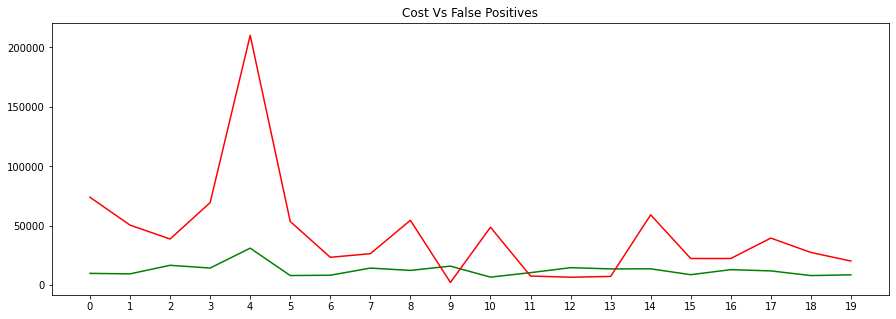

In [250]:
# Check the relation between Cost and False Positive cases (we want both to be less)
plt.figure(figsize = (15,5))
plt.title('Cost Vs False Positives')
plt.xticks(np.arange(0,21,1))
plt.plot(model_selector.Cost, 'g')
plt.plot(model_selector.FP, 'r')
plt.show()

Based on above graph, model 11 (XGB - RO - 2) seems to do justice with Cost Vs FP comparison also. 

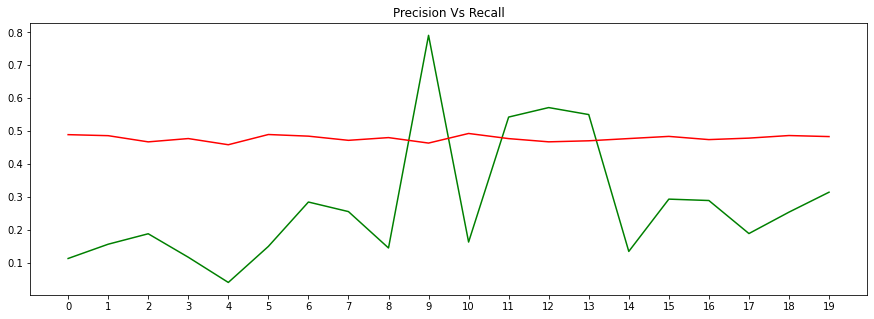

In [251]:
# Check the relation between Precision and Recall
plt.figure(figsize = (15,5))
plt.title('Precision Vs Recall')
plt.xticks(np.arange(0,21,1))
plt.plot(model_selector.Precision, 'g')
plt.plot(model_selector.Recall/2, 'r')
plt.show()

- Based on the above analysis, model 'XGB - RO - 2' seems to be best suited for the job. It has low incorrect fraud tagging and still not so high cost. It also has comparative Precision and Recall.
- Let's try some more modification to see if we can get even better.

In [252]:
# Parameter grid for GridSearch CV method
params = {
    'learning_rate': [0.5],
    'max_depth': [10],
    'n_estimators': [15],
    'max_features': [14],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_leaf_nodes': [5, 10, 15]
#    'random_state': [41, 63],
}

In [253]:
# XGB on Over Sampled data with parameter tuining
xgb_ro = XGBClassifier()
my_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_xgb_ro = GridSearchCV(estimator=xgb_ro, 
                                    param_grid=params, 
                                    cv=3, n_jobs=-1, verbose=1, scoring = my_scorer)
grid_search_xgb_ro.fit(X_train_ro, y_train_ro)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5], 'max_depth': [10],
                         'max_features': [14], 'max_leaf_nodes': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [15]},
             scoring=make_scorer(my_score, greater_is_better=False), verbose=1)

In [254]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_xgb_ro.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)

In [255]:
# Getting the best model based on the score
dt_best = grid_search_xgb_ro.best_estimator_
dt_best

XGBClassifier(learning_rate=0.5, max_depth=10, max_features=14,
              max_leaf_nodes=5, min_samples_leaf=1, n_estimators=15)

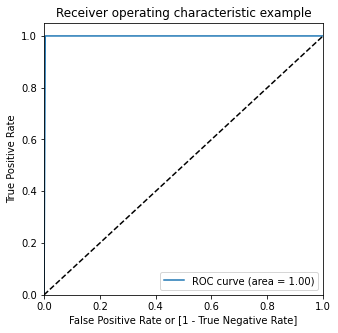

Accuracy    :  0.9978912211414223
Sensitivity :  1.0
Specificity :  0.9957824422828445
Pricision   :  0.9958001553699748
Recall      :  1.0
[[898612   3806]
 [     0 902418]]


In [256]:
# Test the performance of best model on train dataset
y_train_pred = dt_best.predict(X_train_ro)
draw_roc(y_train_ro, y_train_pred)
model_metrics(y_train_ro, y_train_pred)

In [257]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9978912211414223
Accuracy    :  0.9958068553398144
Sensitivity :  1.0
Specificity :  0.9957824422828445
Pricision   :  0.5799116997792495
Recall      :  1.0
[[898612   3806]
 [     0   5254]]


In [258]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9558495058067042
Accuracy    :  0.9947249764140637
Sensitivity :  0.91651865008881
Specificity :  0.9951803615245985
Pricision   :  0.5254582484725051
Recall      :  0.91651865008881
[[384887   1864]
 [   188   2064]]


In [259]:
# Train-Test Metrices
c = cost_train_test(dt_best, 0)

[[1283499    5670]
 [    188    7318]]
Average number of transactions per month detected as fraudulent by the model:  541.0
Total cost of providing customer support per month for fraudulent transactions detected by the model:  811.5
Average number of transactions per month that are fraudulent but not detected by the model:  8.0
Cost incurred due to fraudulent transactions left undetected by the model:  4245.28
Cost incurred per month after the model is built and deployed:  5056.78


In [260]:
# Overall Metrices
c = cost(dt_best, 0)

[[1834979    7764]
 [    440    9211]]
Average number of transactions per month detected as fraudulent by the model:  707.0
Total cost of providing customer support per month for fraudulent transactions detected by the model:  1060.5
Average number of transactions per month that are fraudulent but not detected by the model:  18.0
Cost incurred due to fraudulent transactions left undetected by the model:  9551.88
Cost incurred per month after the model is built and deployed:  10612.38


Even with hyper parameter tuining the result remains the same So, we will finalize the model 11.

### Final Model

In [261]:
# four best models that balances TP, FP, FN and Cost
final_models = model_selector[(model_selector.index == 9) | 
                              (model_selector.index == 10) | 
                              (model_selector.index == 11) |
                              (model_selector.index == 13) 
                              ]
final_models

model     FP  ... ROC - Final cost_scaled
9   XGB - Grid Search - RO - 1   2368  ...    0.901564    0.160971
10                XGB - US - 2  48794  ...    0.966373    0.068275
11                XGB - RO - 2   7764  ...    0.939367    0.106124
13               XGB - ADA - 2   7425  ...    0.941155    0.137678

[4 rows x 14 columns]

Out of the four best models, 'XGB - RO - 2' keeps the true positive comparatively high while keeping a check on false negatives (missed frauds). The model also keeps a tab on incorrectly identified frauds. In process the cost is also comparable. Hence, this is the model to be recommended.

A quick recap of the final model

In [262]:
# Final Model
xgb_ro = XGBClassifier(learning_rate=0.5, max_depth=10, n_estimators=15, max_features = 14)
xgb_ro.fit(X_train_ro, y_train_ro)

XGBClassifier(learning_rate=0.5, max_depth=10, max_features=14, n_estimators=15)

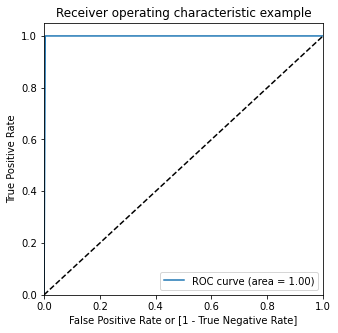

Accuracy    :  0.9978912211414223
Sensitivity :  1.0
Specificity :  0.9957824422828445
Pricision   :  0.9958001553699748
Recall      :  1.0
[[898612   3806]
 [     0 902418]]


In [263]:
# Model performance on train data
y_train_pred = xgb_ro.predict(X_train_ro)
draw_roc(y_train_ro, y_train_pred)
model_metrics(y_train_ro, y_train_pred)

In [264]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9978912211414223
Accuracy    :  0.9958068553398144
Sensitivity :  1.0
Specificity :  0.9957824422828445
Pricision   :  0.5799116997792495
Recall      :  1.0
[[898612   3806]
 [     0   5254]]


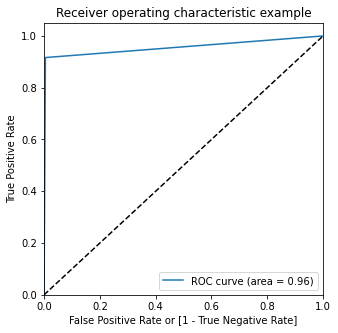

Accuracy    :  0.9947249764140637
Sensitivity :  0.91651865008881
Specificity :  0.9951803615245985
Pricision   :  0.5254582484725051
Recall      :  0.91651865008881
[[384887   1864]
 [   188   2064]]


In [265]:
# Model performance on test data
y_test_pred = xgb_ro.predict(X_test)
draw_roc(y_test, y_test_pred)
model_metrics(y_test, y_test_pred)

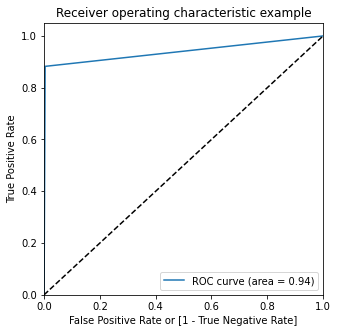

Accuracy    :  0.9957784419823688
Sensitivity :  0.8825174825174825
Specificity :  0.9962173078937956
Pricision   :  0.4747930775018811
Recall      :  0.8825174825174825
[[551480   2094]
 [   252   1893]]


In [266]:
# Model performance on final data
y_final_pred = xgb_ro.predict(X_final)
draw_roc(y_final, y_final_pred)
model_metrics(y_final, y_final_pred)

In [267]:
# Extracting the features significance
imp_df = pd.DataFrame({
    "Varname": X_train_smte.columns,
    "Imp": xgb_ro.feature_importances_})

imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
2          amt  0.529314
16  trans_time  0.145370
1     category  0.116614
14         age  0.051775
9     city_pop  0.020419
3       gender  0.015865
5        state  0.014152
12   merch_lat  0.013135
11   unix_time  0.012924
7          lat  0.012828
8         long  0.012765
10         job  0.012594
4         city  0.012338
6          zip  0.010249
13  merch_long  0.010102
0     merchant  0.009556
15  trans_date  0.000000

In [268]:
# Finally the financials of this model
c = cost(xgb_ro, 0)

[[1834979    7764]
 [    440    9211]]
Average number of transactions per month detected as fraudulent by the model:  707.0
Total cost of providing customer support per month for fraudulent transactions detected by the model:  1060.5
Average number of transactions per month that are fraudulent but not detected by the model:  18.0
Cost incurred due to fraudulent transactions left undetected by the model:  9551.88
Cost incurred per month after the model is built and deployed:  10612.38
